In [19]:
def visualize(log_file_add):

    # Define regular expressions to extract relevant information
    log_round_pattern = re.compile(r'-- Log At Round (\d+) --')
    test_accuracy_pattern = re.compile(r'Test_0 Accuracy: ([\d.]+)')
    out_forgetting_pattern = re.compile(r'In_forgetting: ([\d.-]+)')
    accuracy_loss_pattern = re.compile(r'Accuracy: ([\d.]+) Loss: ([\d.]+)')
    out_forgetting_pattern = re.compile(r'Out_forgetting: ([\d.-]+)')
    in_forgetting_pattern = re.compile(r'In_forgetting: ([\d.-]+)')
    out_loss_pattern = re.compile(r'Out_Loss: ([\d.-]+)')
    in_loss_pattern = re.compile(r'In_Loss: ([\d.-]+)')
    classifier_divergence_pattern = re.compile(r'classifier divergence: ([\d.-]+)')
    feature_extractor_divergence_pattern = re.compile(r'feature_extractor divergence: ([\d.-]+)')
    classifier_difference_pattern = re.compile(r'classifier difference: ([\d.-]+)')
    feature_extractor_difference_pattern = re.compile(r'feature_extractor difference: ([\d.-]+)')

    # Initialize lists to store extracted data
    log_rounds = []
    test_accuracies = []
    accuracies = []
    losses = []
    out_forgetting = []
    in_forgetting = []
    out_loss = []
    in_loss = []
    classifier_divergence = []
    feature_extractor_divergence = []
    classifier_difference = []
    feature_extractor_difference = []

    # Read the text data
    with open(log_file_add, 'r') as log_file:
        lines = log_file.readlines()

    # Extract data from the log
    current_round = None
    for line in lines:
        match = log_round_pattern.search(line)
        if match:
            current_round = int(match.group(1))
            log_rounds.append(current_round)
        if current_round is not None:
            if 'Test_0 Accuracy' in line:
                match = test_accuracy_pattern.search(line)
                if match:
                    test_accuracies.append(float(match.group(1)))
            if 'Accuracy' in line:
                match = accuracy_loss_pattern.search(line)
                if match:
                    accuracies.append(float(match.group(1)))
                    losses.append(float(match.group(2)))
            if 'Out_forgetting' in line:
                match = out_forgetting_pattern.search(line)
                if match:
                    out_forgetting.append(float(match.group(1)))
            if 'In_forgetting' in line:
                match = in_forgetting_pattern.search(line)
                if match:
                    in_forgetting.append(float(match.group(1)))
            if 'Out_Loss' in line:
                match = out_loss_pattern.search(line)
                if match:
                    out_loss.append(float(match.group(1)))
            if 'In_Loss' in line:
                match = in_loss_pattern.search(line)
                if match:
                    in_loss.append(float(match.group(1)))
            if 'classifier divergence' in line:
                match = classifier_divergence_pattern.search(line)
                if match:
                    classifier_divergence.append(float(match.group(1)))
            if 'feature_extractor divergence' in line:
                match = feature_extractor_divergence_pattern.search(line)
                if match:
                    feature_extractor_divergence.append(float(match.group(1)))
            if 'classifier difference' in line:
                match = classifier_difference_pattern.search(line)
                if match:
                    classifier_difference.append(float(match.group(1)))
            if 'feature_extractor difference' in line:
                match = feature_extractor_difference_pattern.search(line)
                if match:
                    feature_extractor_difference.append(float(match.group(1)))

    # Plot the extracted data
    plt.figure(figsize=(12, 18))

    # Test_0 Accuracy
    plt.subplot(3, 2, 1)
    plt.plot(log_rounds, test_accuracies, marker='o',  label='Test Accuracy')
    plt.plot(log_rounds, accuracies, marker='o', label='Train Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Log Round')
    plt.ylabel('Accuracy')
    plt.legend()

    # Accuracy and Loss
    plt.subplot(3, 2, 2)
    plt.plot(log_rounds, losses, marker='o')
    plt.title('Global Loss')
    plt.xlabel('Log Round')

    # Out_forgetting
    plt.subplot(3, 2, 3)
    plt.plot(log_rounds[0:len(out_forgetting)], out_forgetting, marker='o', label='Out_forgetting')
    plt.plot(log_rounds[0:len(in_forgetting)], in_forgetting, marker='o', label='In_forgetting')
    plt.title('Accuracy Difference after Local training')
    plt.xlabel('Log Round')
    plt.legend()

    # Out_Loss
    plt.subplot(3, 2, 4)
    plt.plot(log_rounds[0:len(out_loss)], out_loss, marker='o', label='Out_Loss')
    plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o', label='In_Loss')
    plt.title('Loss Difference after Local training')
    plt.xlabel('Log Round')
    plt.legend()

    # # In_Loss
    # plt.subplot(3, 3, 5)
    # plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o')
    # plt.title('In_Loss')
    # plt.xlabel('Log Round')

    # Classifier Divergence
    plt.subplot(3, 2, 5)
    plt.plot(log_rounds[0:len(classifier_divergence)], classifier_divergence, marker='o',label= 'Classifier Divergence')
    plt.plot(log_rounds[0:len(feature_extractor_divergence)], feature_extractor_divergence, marker='o',label= 'Feature Extractor Divergence')
    plt.title('Divergence after Local training')
    plt.xlabel('Log Round')
    plt.legend()


    # # Feature Extractor Divergence
    # plt.subplot(3, 3, 7)
    # plt.plot(log_rounds, feature_extractor_divergence, marker='o')
    # plt.title('Feature Extractor Divergence')
    # plt.xlabel('Log Round')

    # Classifier Difference
    plt.subplot(3, 2, 6)
    plt.plot(log_rounds[0:len(classifier_difference)], classifier_difference, marker='o',label= 'Classifier Difference')
    plt.plot(log_rounds[0:len(feature_extractor_difference)], feature_extractor_difference, marker='o',label= 'Feature Extractor Difference')
    plt.title('Norm Difference after Local training')
    plt.xlabel('Log Round')
    plt.legend()


    # # Feature Extractor Difference
    # plt.subplot(3, 3, 9)
    # plt.plot(log_rounds, feature_extractor_difference, marker='o')
    # plt.title('Feature Extractor Difference')
    # plt.xlabel('Log Round')

    plt.tight_layout()
    plt.show()


In [1]:
import re
import matplotlib.pyplot as plt

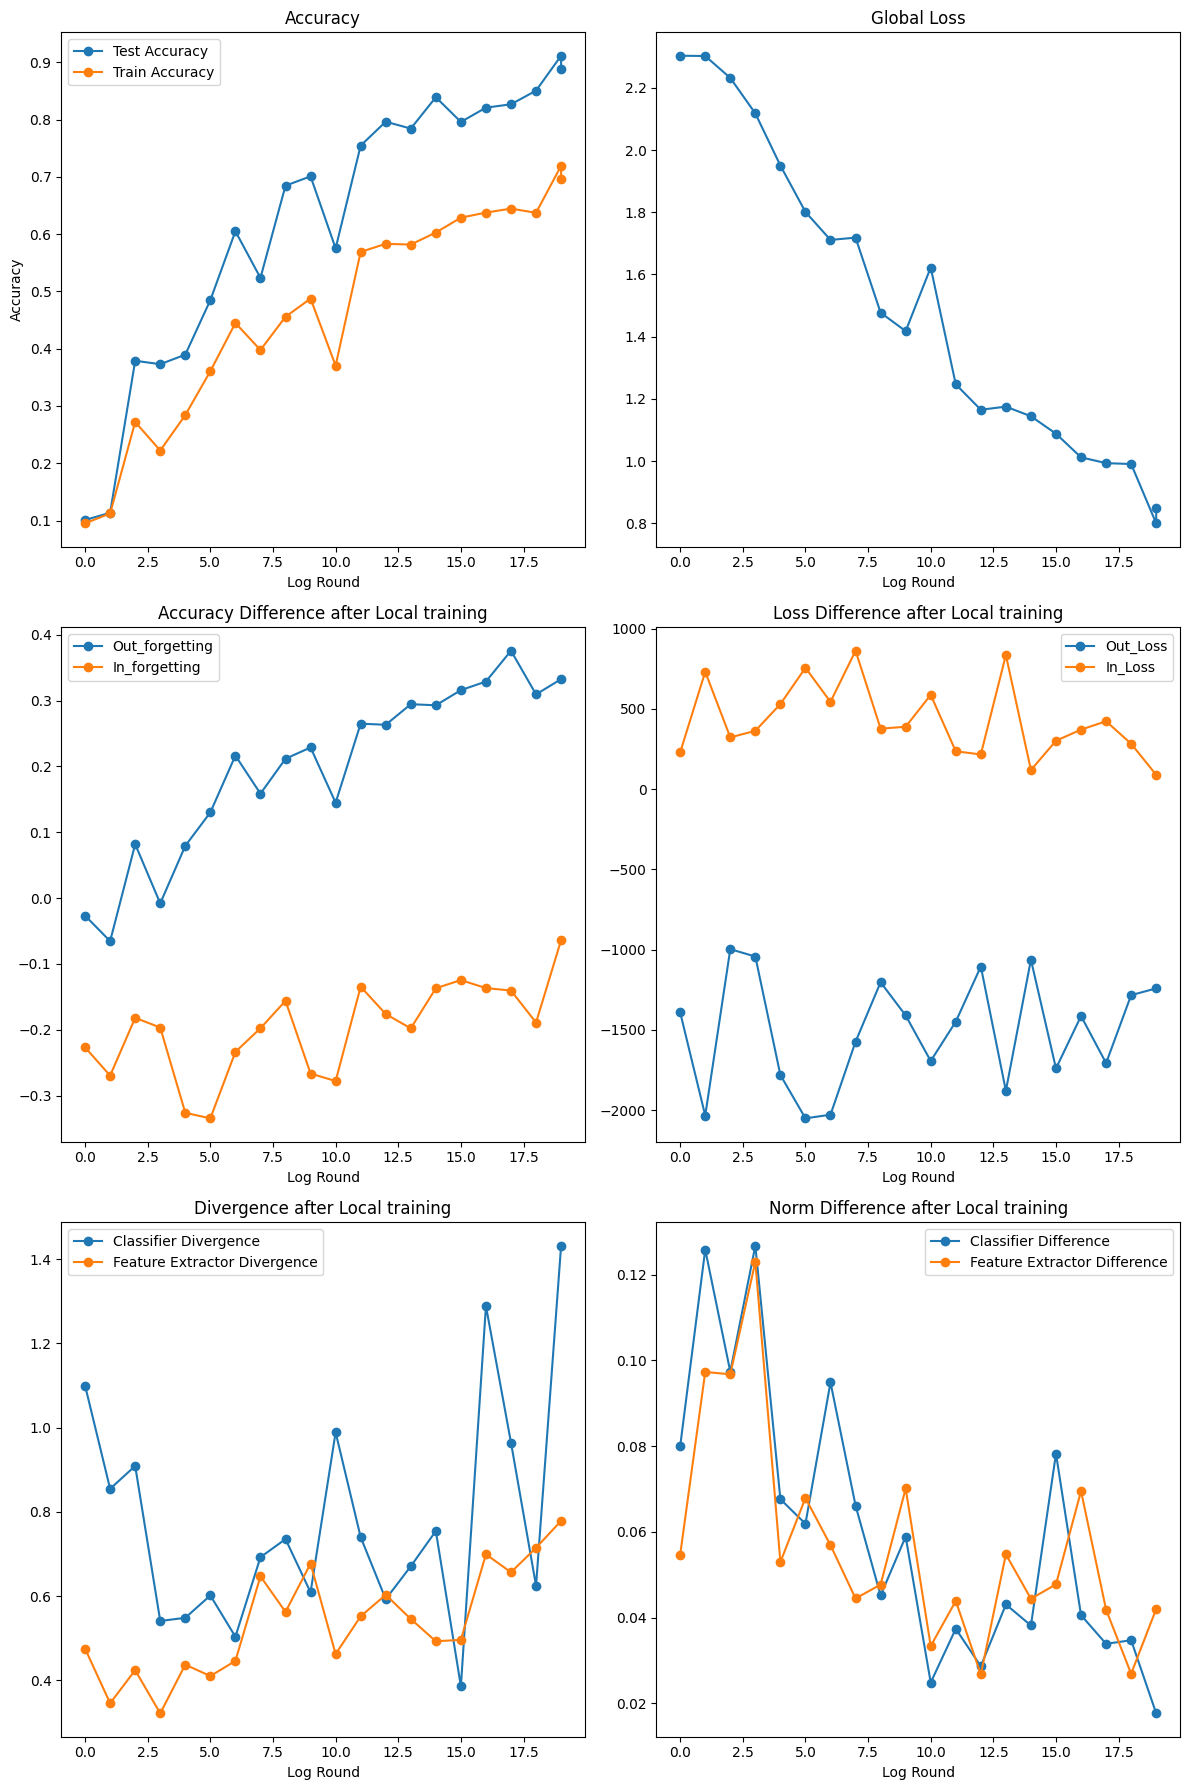

In [21]:
visualize('slurm-10915044.out')

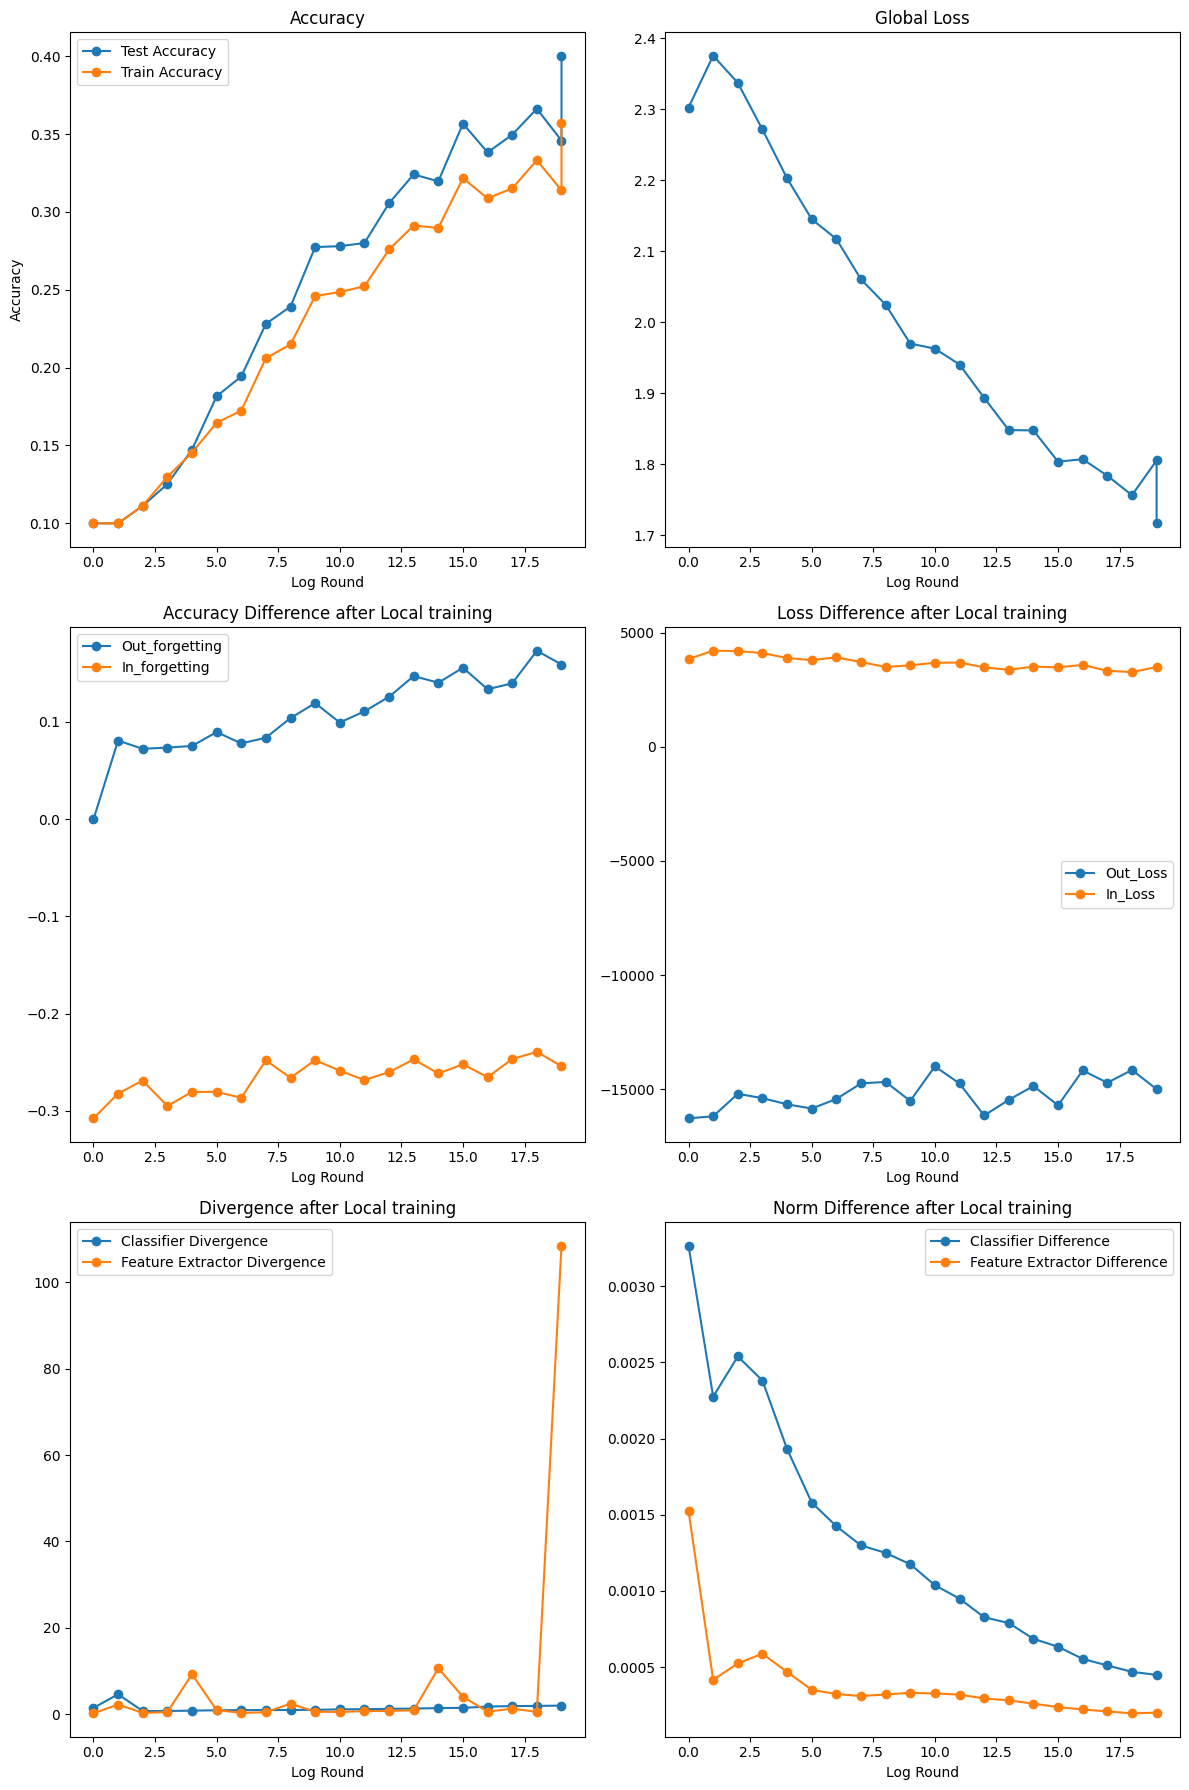

In [22]:
visualize('slurm-10915042.out')

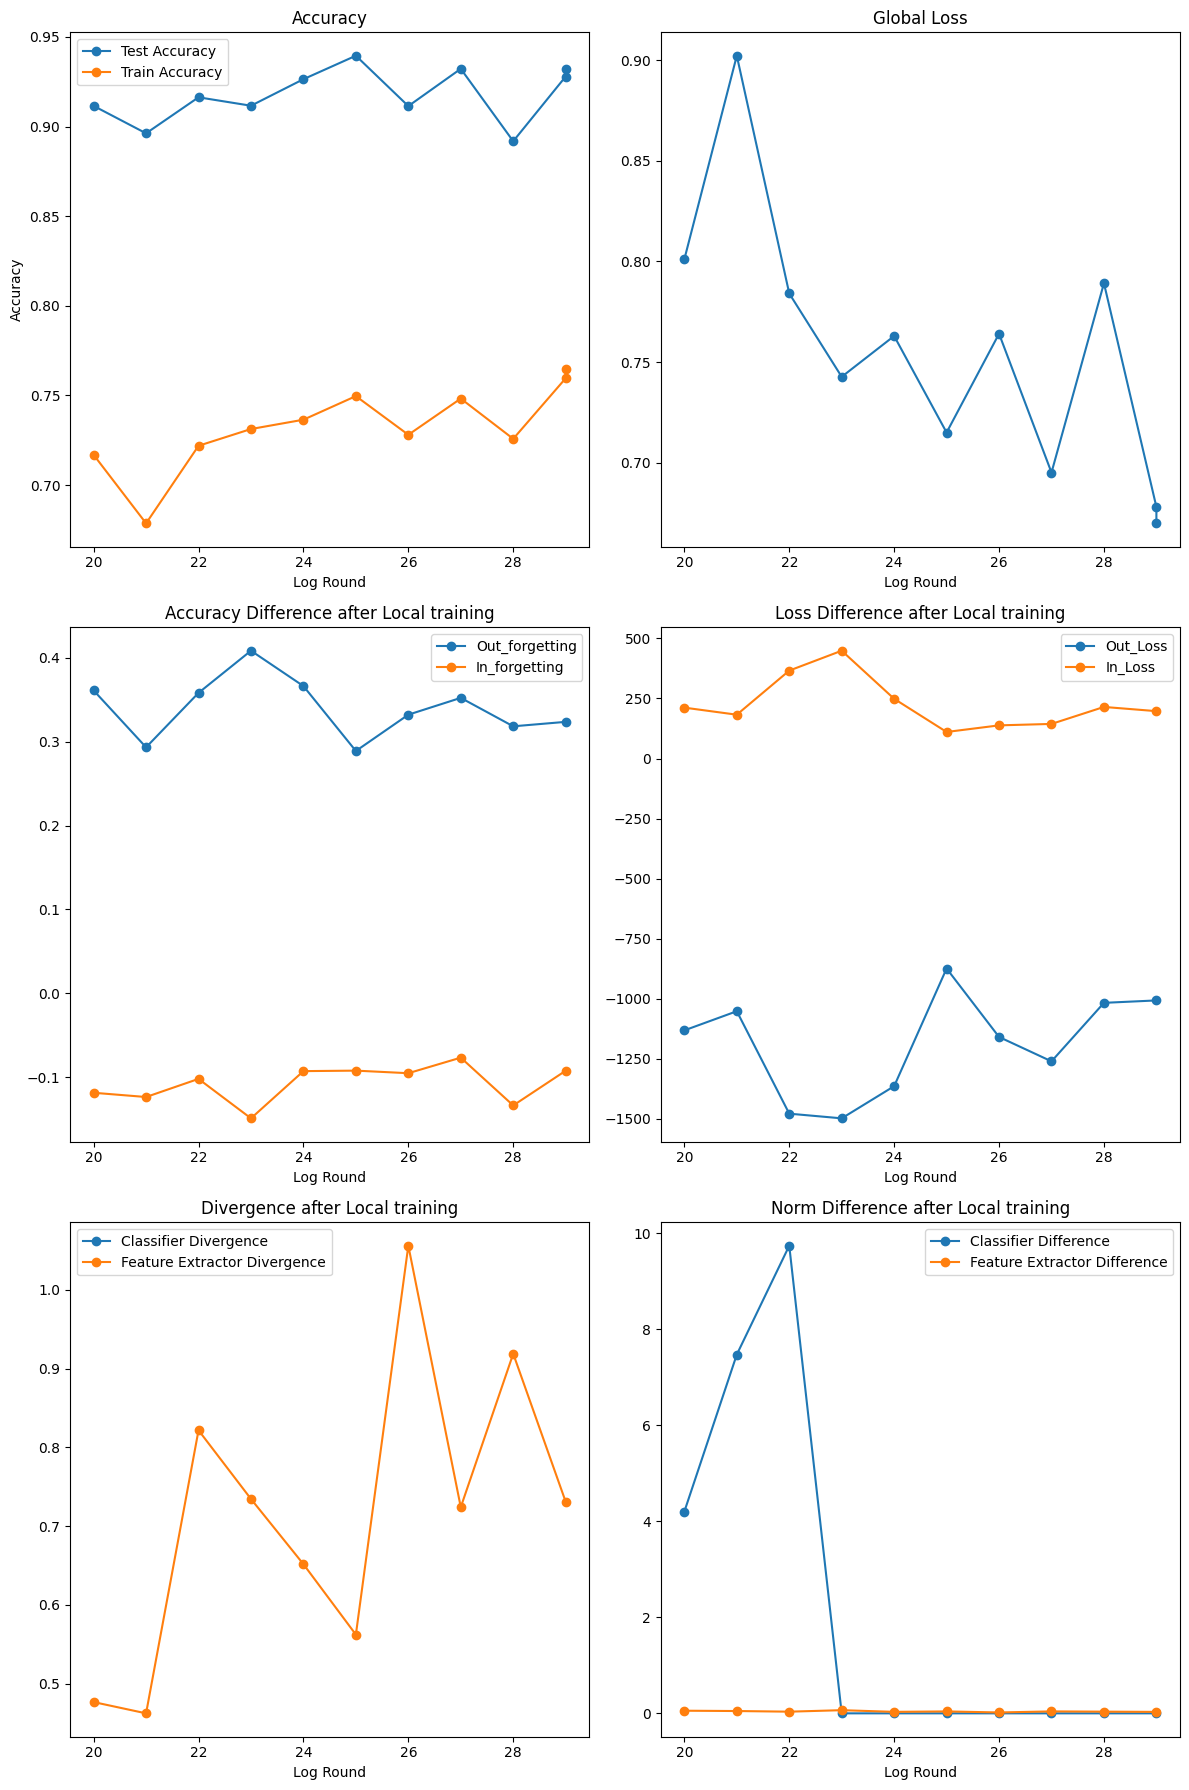

In [23]:
# no classifier training
visualize('slurm-10917756.out')

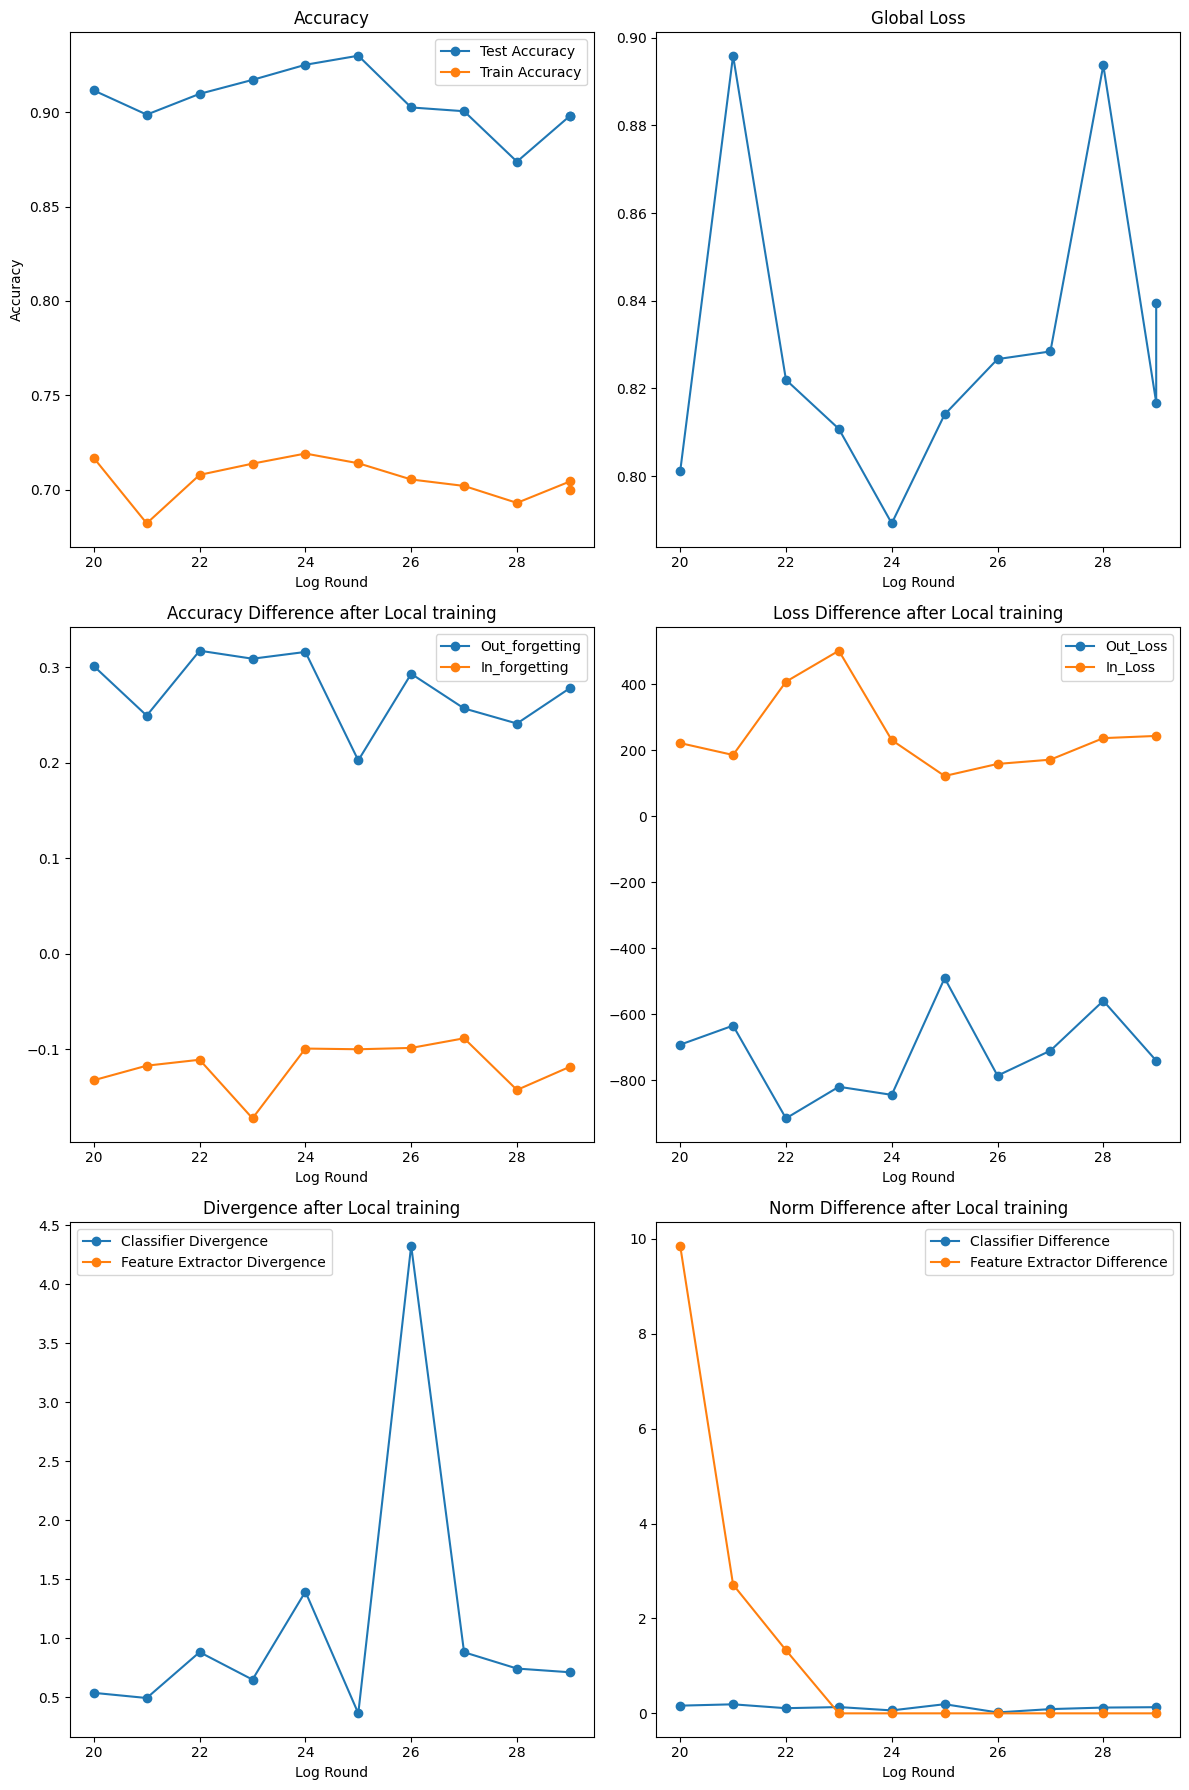

In [27]:
# no feature extractor training
visualize('slurm-10917768.out')

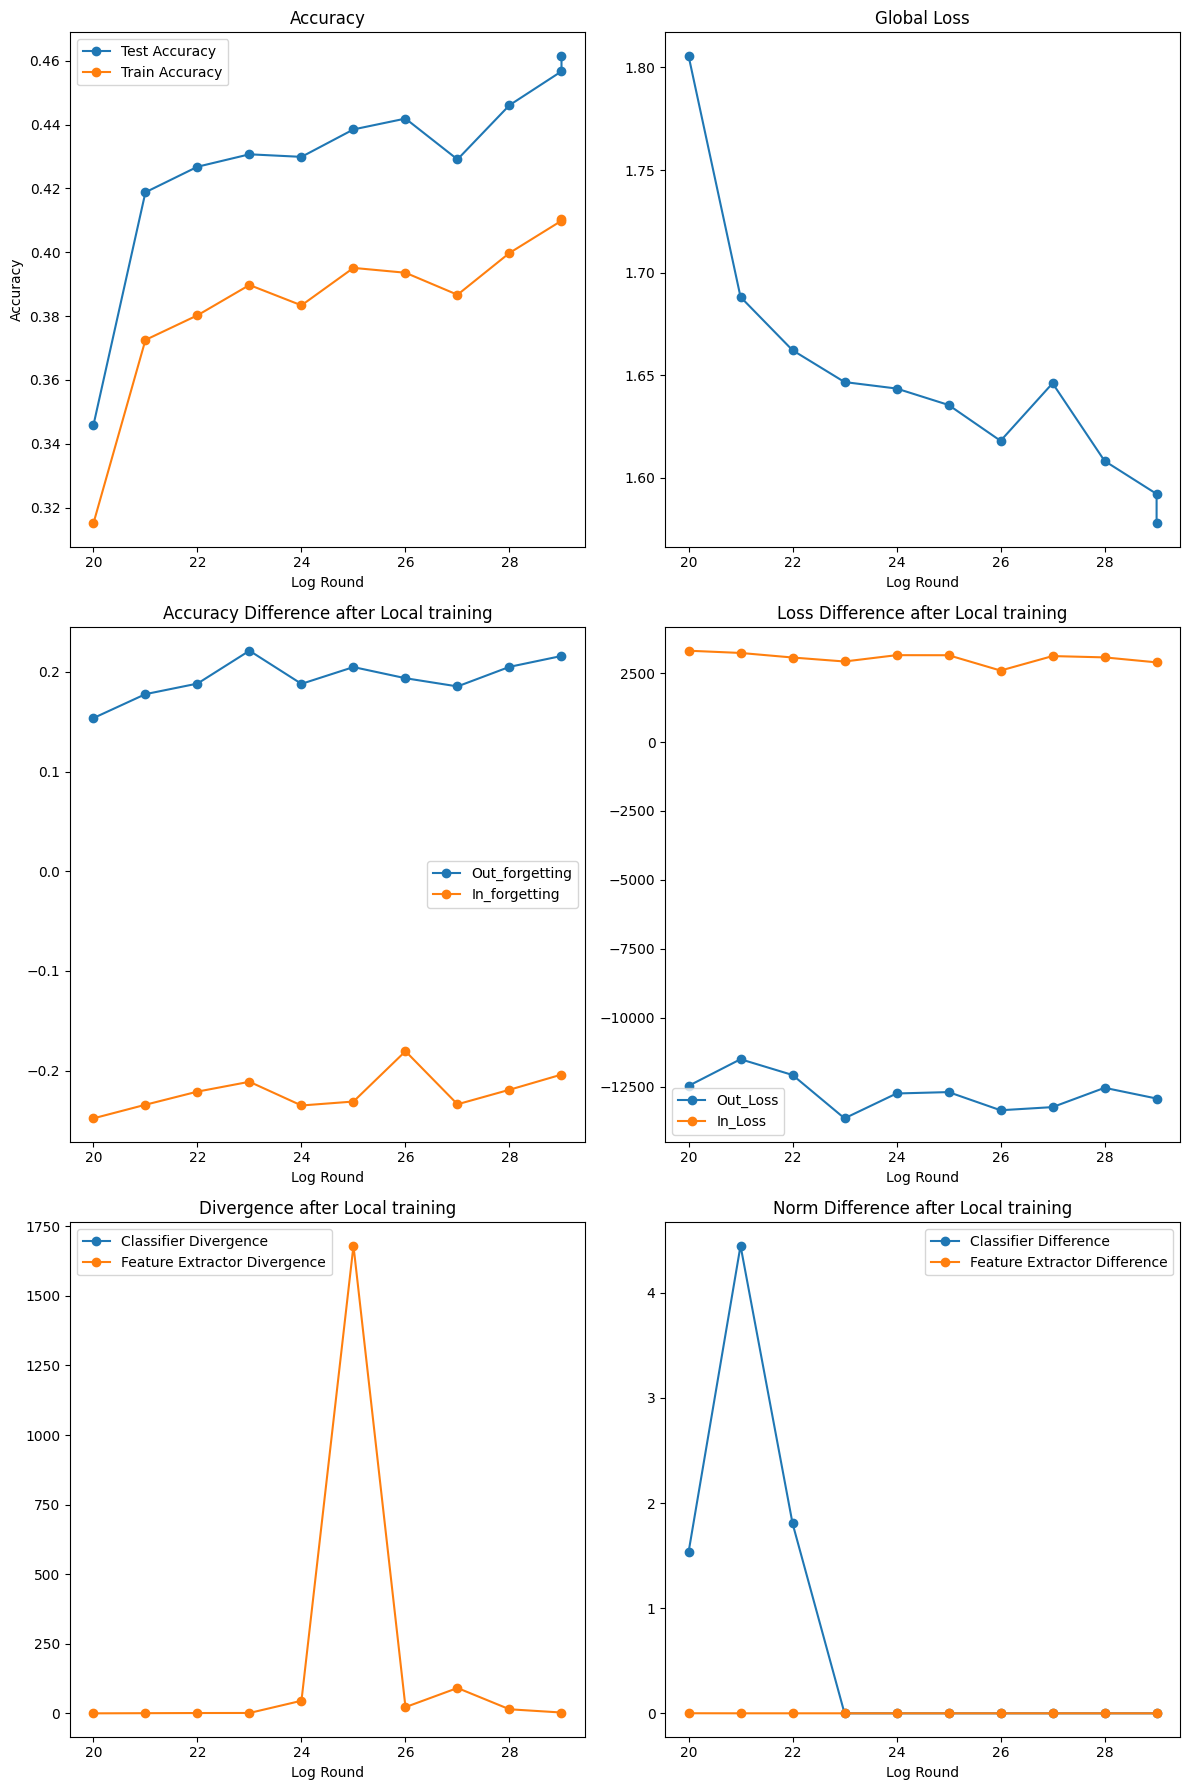

In [24]:
# no classifier training
visualize('slurm-10917757.out')

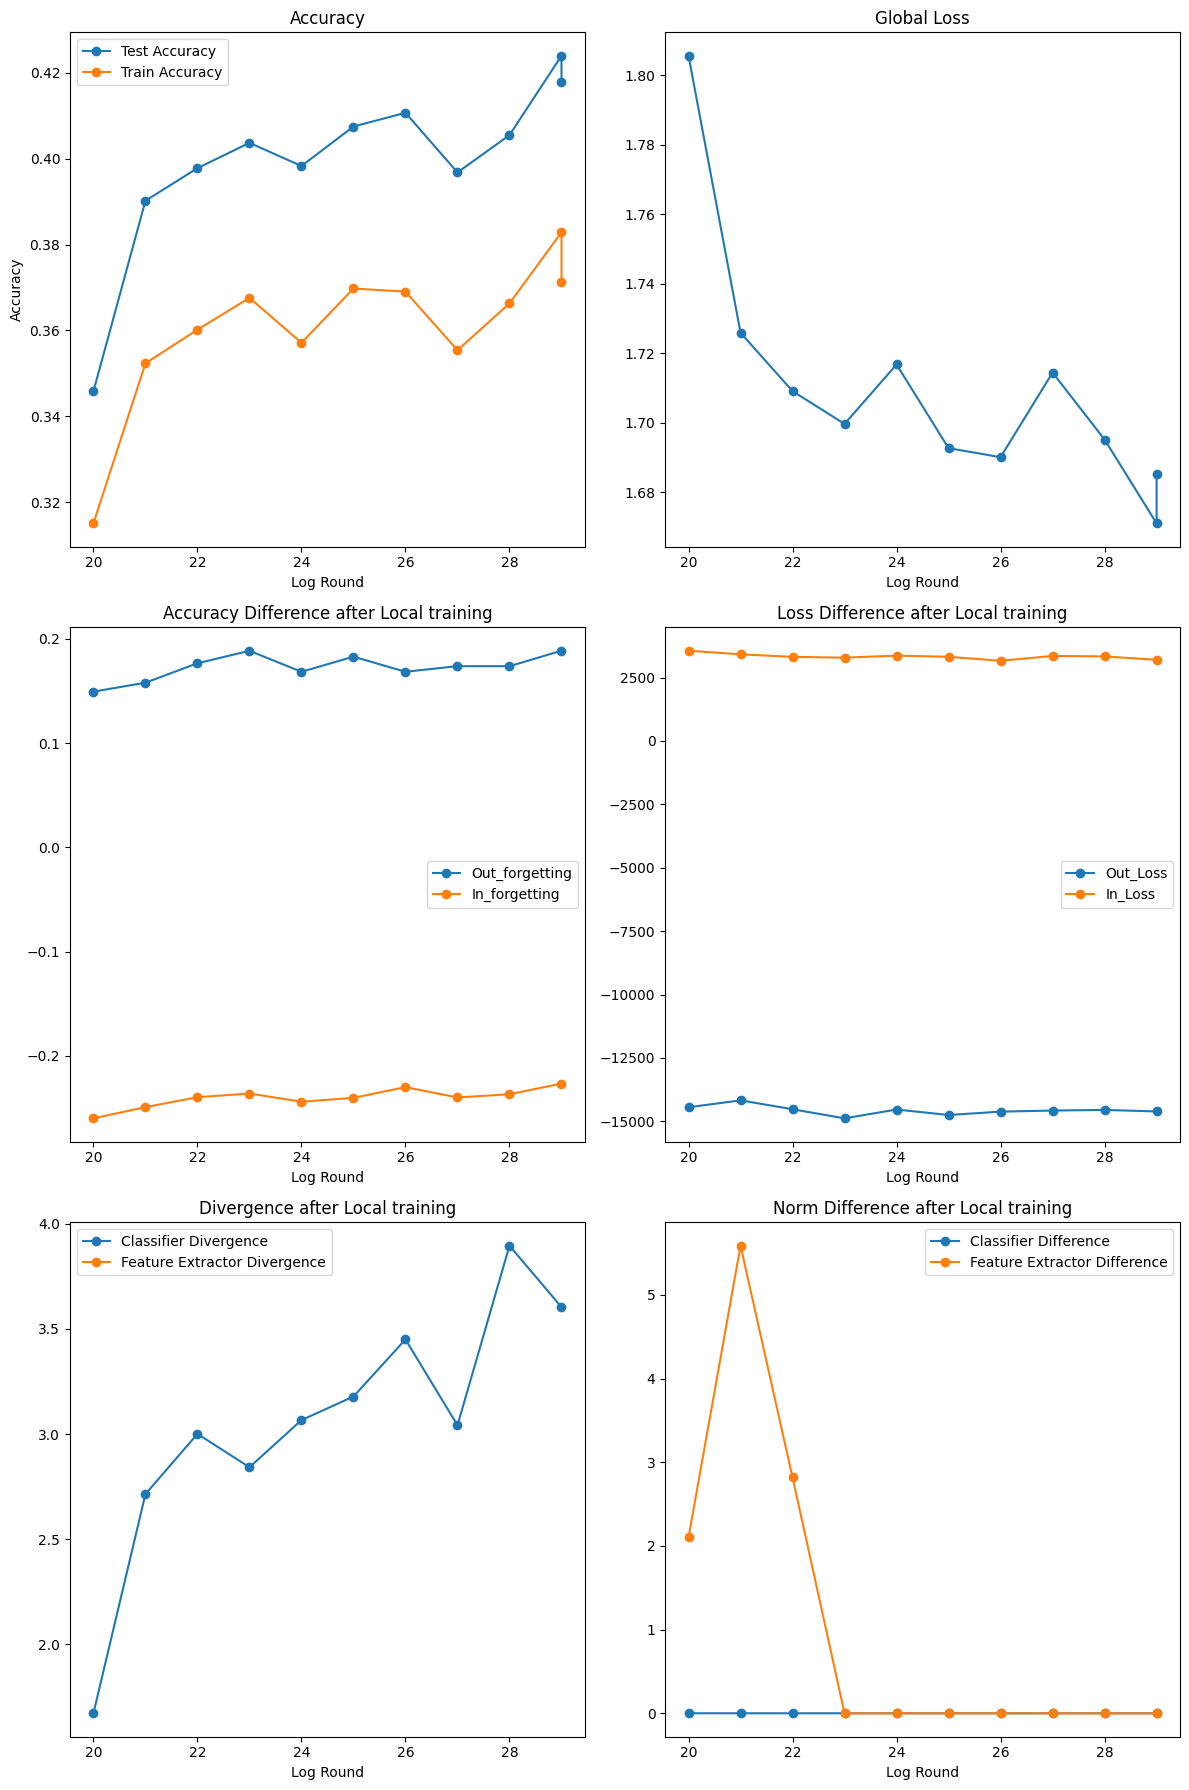

In [26]:
# no feature extractor training
visualize('slurm-10917765.out')

In [24]:
def local_visualize(log_file_add):

    # Define regular expressions to extract relevant information
    log_round_pattern = re.compile(r'active layer: ([a-zA-Z.]+)')
    test_accuracy_pattern = re.compile(r'Test_0 Accuracy: ([\d.]+)')
    accuracy_loss_pattern = re.compile(r'Accuracy: ([\d.]+) Loss: ([\d.]+)')
    out_forgetting_pattern = re.compile(r'Out_forgetting: ([\d.-]+)')
    in_forgetting_pattern = re.compile(r'In_forgetting: ([\d.-]+)')
    out_loss_pattern = re.compile(r'Out_Loss: ([\d.-]+)')
    in_loss_pattern = re.compile(r'In_Loss: ([\d.-]+)')
    divergence_pattern = re.compile(r'([a-zA-Z0-9.]+) divergence: ([\d.-]+)')
    difference_pattern = re.compile(r'([a-zA-Z0-9.]+) difference: ([\d.-]+)')

    # Initialize lists to store extracted data
    log_rounds = []
    test_accuracies = []
    accuracies = []
    losses = []
    out_forgetting = []
    in_forgetting = []
    out_loss = []
    in_loss = []
    divergence = []

    difference = []

    # Read the text data
    with open(log_file_add, 'r') as log_file:
        lines = log_file.readlines()

    # Extract data from the log
    current_round = None
    for line in lines:
        match = log_round_pattern.search(line)
        if match:
            current_round = match.group(1)
            log_rounds.append(current_round)
        if current_round is not None:
            if 'Test_0 Accuracy' in line:
                match = test_accuracy_pattern.search(line)
                if match:
                    test_accuracies.append(float(match.group(1)))
            if 'Accuracy' in line:
                match = accuracy_loss_pattern.search(line)
                if match:
                    accuracies.append(float(match.group(1)))
                    losses.append(float(match.group(2)))
            if 'Out_forgetting' in line:
                match = out_forgetting_pattern.search(line)
                if match:
                    out_forgetting.append(float(match.group(1)))
            if 'In_forgetting' in line:
                match = in_forgetting_pattern.search(line)
                if match:
                    in_forgetting.append(float(match.group(1)))
            if 'Out_Loss' in line:
                match = out_loss_pattern.search(line)
                if match:
                    out_loss.append(float(match.group(1)))
            if 'In_Loss' in line:
                match = in_loss_pattern.search(line)
                if match:
                    in_loss.append(float(match.group(1)))
            if 'divergence' in line:
                match = divergence_pattern.search(line)
                if match:
                    divergence.append(float(match.group(2)))
            if 'difference' in line:
                match = difference_pattern.search(line)
                if match:
                    difference.append(float(match.group(2)))
           

    # Plot the extracted data
    plt.figure(figsize=(12, 18))
    log_rounds_1 = log_rounds
    log_rounds = list(range(len(log_rounds_1)))

    # Test_0 Accuracy
    plt.subplot(3, 2, 1)
    plt.plot(log_rounds[0:len(test_accuracies[1::2])], test_accuracies[1::2], marker='o',  label='Test Accuracy')
    plt.plot(log_rounds[0:len(accuracies[1::2])], accuracies[1::2], marker='o', label='Train Accuracy')
#     plt.plot(log_rounds, test_accuracies, marker='o',  label='Test Accuracy')
#     plt.plot(log_rounds, accuracies, marker='o', label='Train Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Layer')
    plt.ylabel('Accuracy')
    plt.legend()

    # Accuracy and Loss
    plt.subplot(3, 2, 2)
    plt.plot(log_rounds[0:len(losses[1::2])], losses[1::2], marker='o')
#     plt.plot(log_rounds, losses, marker='o')
    plt.title('Global Loss')
    plt.xlabel('Layer')

    # Out_forgetting
    plt.subplot(3, 2, 3)
    plt.plot(log_rounds[0:len(out_forgetting)], out_forgetting, marker='o', label='Out_forgetting')
    plt.plot(log_rounds[0:len(in_forgetting)], in_forgetting, marker='o', label='In_forgetting')
    plt.title('Accuracy Difference after Local training')
    plt.xlabel('Layer')
    plt.legend()

    # Out_Loss
    plt.subplot(3, 2, 4)
    plt.plot(log_rounds[0:len(out_loss)], out_loss, marker='o', label='Out_Loss')
    plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o', label='In_Loss')
    plt.title('Loss Difference after Local training')
    plt.xlabel('Layer')
    plt.legend()

    # # In_Loss
    # plt.subplot(3, 3, 5)
    # plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o')
    # plt.title('In_Loss')
    # plt.xlabel('Log Round')

    # Classifier Divergence
    plt.subplot(3, 2, 5)
    plt.plot(log_rounds[0:len(divergence)], divergence, marker='o',label= 'Divergence')
    plt.title('Divergence after Local training')
    plt.xlabel('Layer')
    plt.legend()


    # # Feature Extractor Divergence
    # plt.subplot(3, 3, 7)
    # plt.plot(log_rounds, feature_extractor_divergence, marker='o')
    # plt.title('Feature Extractor Divergence')
    # plt.xlabel('Log Round')

    # Classifier Difference
    plt.subplot(3, 2, 6)
    plt.plot(log_rounds[0:len(difference)], difference, marker='o',label= 'Difference')
    plt.title('Norm Difference after Local training')
    plt.xlabel('Layer')
    plt.legend()


    # # Feature Extractor Difference
    # plt.subplot(3, 3, 9)
    # plt.plot(log_rounds, feature_extractor_difference, marker='o')
    # plt.title('Feature Extractor Difference')
    # plt.xlabel('Log Round')

    plt.tight_layout()
    plt.show()


In [29]:
def new_visualize(log_file_add):

    # Define regular expressions to extract relevant information
    log_round_pattern = re.compile(r'-- Log At Round (\d+) --')
    test_accuracy_pattern = re.compile(r'Test_0 Accuracy: ([\d.]+)')
    accuracy_loss_pattern = re.compile(r'Accuracy: ([\d.]+) Loss: ([\d.]+)')
    out_forgetting_pattern = re.compile(r'Out_forgetting: ([\d.-]+)')
    in_forgetting_pattern = re.compile(r'In_forgetting: ([\d.-]+)')
    out_loss_pattern = re.compile(r'Out_Loss: ([\d.-]+)')
    in_loss_pattern = re.compile(r'In_Loss: ([\d.-]+)')
    divergence_pattern = re.compile(r'([a-zA-Z0-9.]+) divergence: ([\d.-]+)')
    difference_pattern = re.compile(r'([a-zA-Z0-9.]+) difference: ([\d.-]+)')

    # Initialize lists to store extracted data
    log_rounds = []
    test_accuracies = []
    accuracies = []
    losses = []
    out_forgetting = []
    in_forgetting = []
    out_loss = []
    in_loss = []
    divergence = {}

    difference = {}

    # Read the text data
    with open(log_file_add, 'r') as log_file:
        lines = log_file.readlines()

    # Extract data from the log
    current_round = None
    for line in lines:
        match = log_round_pattern.search(line)
        if match:
            current_round = match.group(1)
            log_rounds.append(current_round)
        if current_round is not None:
            if 'Test_0 Accuracy' in line:
                match = test_accuracy_pattern.search(line)
                if match:
                    test_accuracies.append(float(match.group(1)))
            if 'Accuracy' in line:
                match = accuracy_loss_pattern.search(line)
                if match:
                    accuracies.append(float(match.group(1)))
                    losses.append(float(match.group(2)))
            if 'Out_forgetting' in line:
                match = out_forgetting_pattern.search(line)
                if match:
                    out_forgetting.append(float(match.group(1)))
            if 'In_forgetting' in line:
                match = in_forgetting_pattern.search(line)
                if match:
                    in_forgetting.append(float(match.group(1)))
            if 'Out_Loss' in line:
                match = out_loss_pattern.search(line)
                if match:
                    out_loss.append(float(match.group(1)))
            if 'In_Loss' in line:
                match = in_loss_pattern.search(line)
                if match:
                    in_loss.append(float(match.group(1)))
            if 'divergence' in line:
                match = divergence_pattern.search(line)
                if match:
                    if match.group(1) not in divergence:
                        divergence[match.group(1)] = []
                    divergence[match.group(1)].append(float(match.group(2)))
            if 'difference' in line:
                match = difference_pattern.search(line)
                if match:
                    if match.group(1) not in difference:
                        difference[match.group(1)] = []
                    difference[match.group(1)].append(float(match.group(2)))
           

    # Plot the extracted data
    plt.figure(figsize=(12, 18))
    log_rounds_1 = log_rounds
    log_rounds = list(range(len(log_rounds_1)))

    # Test_0 Accuracy
    plt.subplot(3, 2, 1)
    plt.plot(log_rounds[0:len(test_accuracies)], test_accuracies, marker='o',  label='Test Accuracy')
    plt.plot(log_rounds[0:len(accuracies)], accuracies, marker='o', label='Train Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Communication Round')
    plt.ylabel('Accuracy')
    plt.legend()

    # Accuracy and Loss
    plt.subplot(3, 2, 2)
    plt.plot(log_rounds[0:len(losses)], losses, marker='o')
    plt.title('Global Loss')
    plt.xlabel('Communication Round')

    # Out_forgetting
    plt.subplot(3, 2, 3)
    plt.plot(log_rounds[0:len(out_forgetting)], out_forgetting, marker='o', label='Out_forgetting')
    plt.plot(log_rounds[0:len(in_forgetting)], in_forgetting, marker='o', label='In_forgetting')
    plt.title('Accuracy Difference after Local training')
    plt.xlabel('Communication Round')
    plt.legend()

    # Out_Loss
    plt.subplot(3, 2, 4)
    plt.plot(log_rounds[0:len(out_loss)], out_loss, marker='o', label='Out_Loss')
    plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o', label='In_Loss')
    plt.title('Loss Difference after Local training')
    plt.xlabel('Communication Round')
    plt.legend()

    # # In_Loss
    # plt.subplot(3, 3, 5)
    # plt.plot(log_rounds[0:len(in_loss)], in_loss, marker='o')
    # plt.title('In_Loss')
    # plt.xlabel('Log Round')

    # Classifier Divergence
    plt.subplot(3, 2, 5)
    for key in divergence:
        plt.plot(log_rounds[0:len(divergence[key])], divergence[key], marker='o',label= key)
    plt.title('Divergence after Local training')
    plt.xlabel('Communication Round')
    plt.legend()


    # # Feature Extractor Divergence
    # plt.subplot(3, 3, 7)
    # plt.plot(log_rounds, feature_extractor_divergence, marker='o')
    # plt.title('Feature Extractor Divergence')
    # plt.xlabel('Log Round')

    # Classifier Difference
    plt.subplot(3, 2, 6)
    for key in difference:
        plt.plot(log_rounds[1:len(difference[key])], difference[key][1:len(difference[key])], marker='o',label= key)
    plt.title('Norm Difference after Local training')
    plt.xlabel('Communication Round')
    plt.legend()


    # # Feature Extractor Difference
    # plt.subplot(3, 3, 9)
    # plt.plot(log_rounds, feature_extractor_difference, marker='o')
    # plt.title('Feature Extractor Difference')
    # plt.xlabel('Log Round')

    plt.tight_layout()
    plt.show()


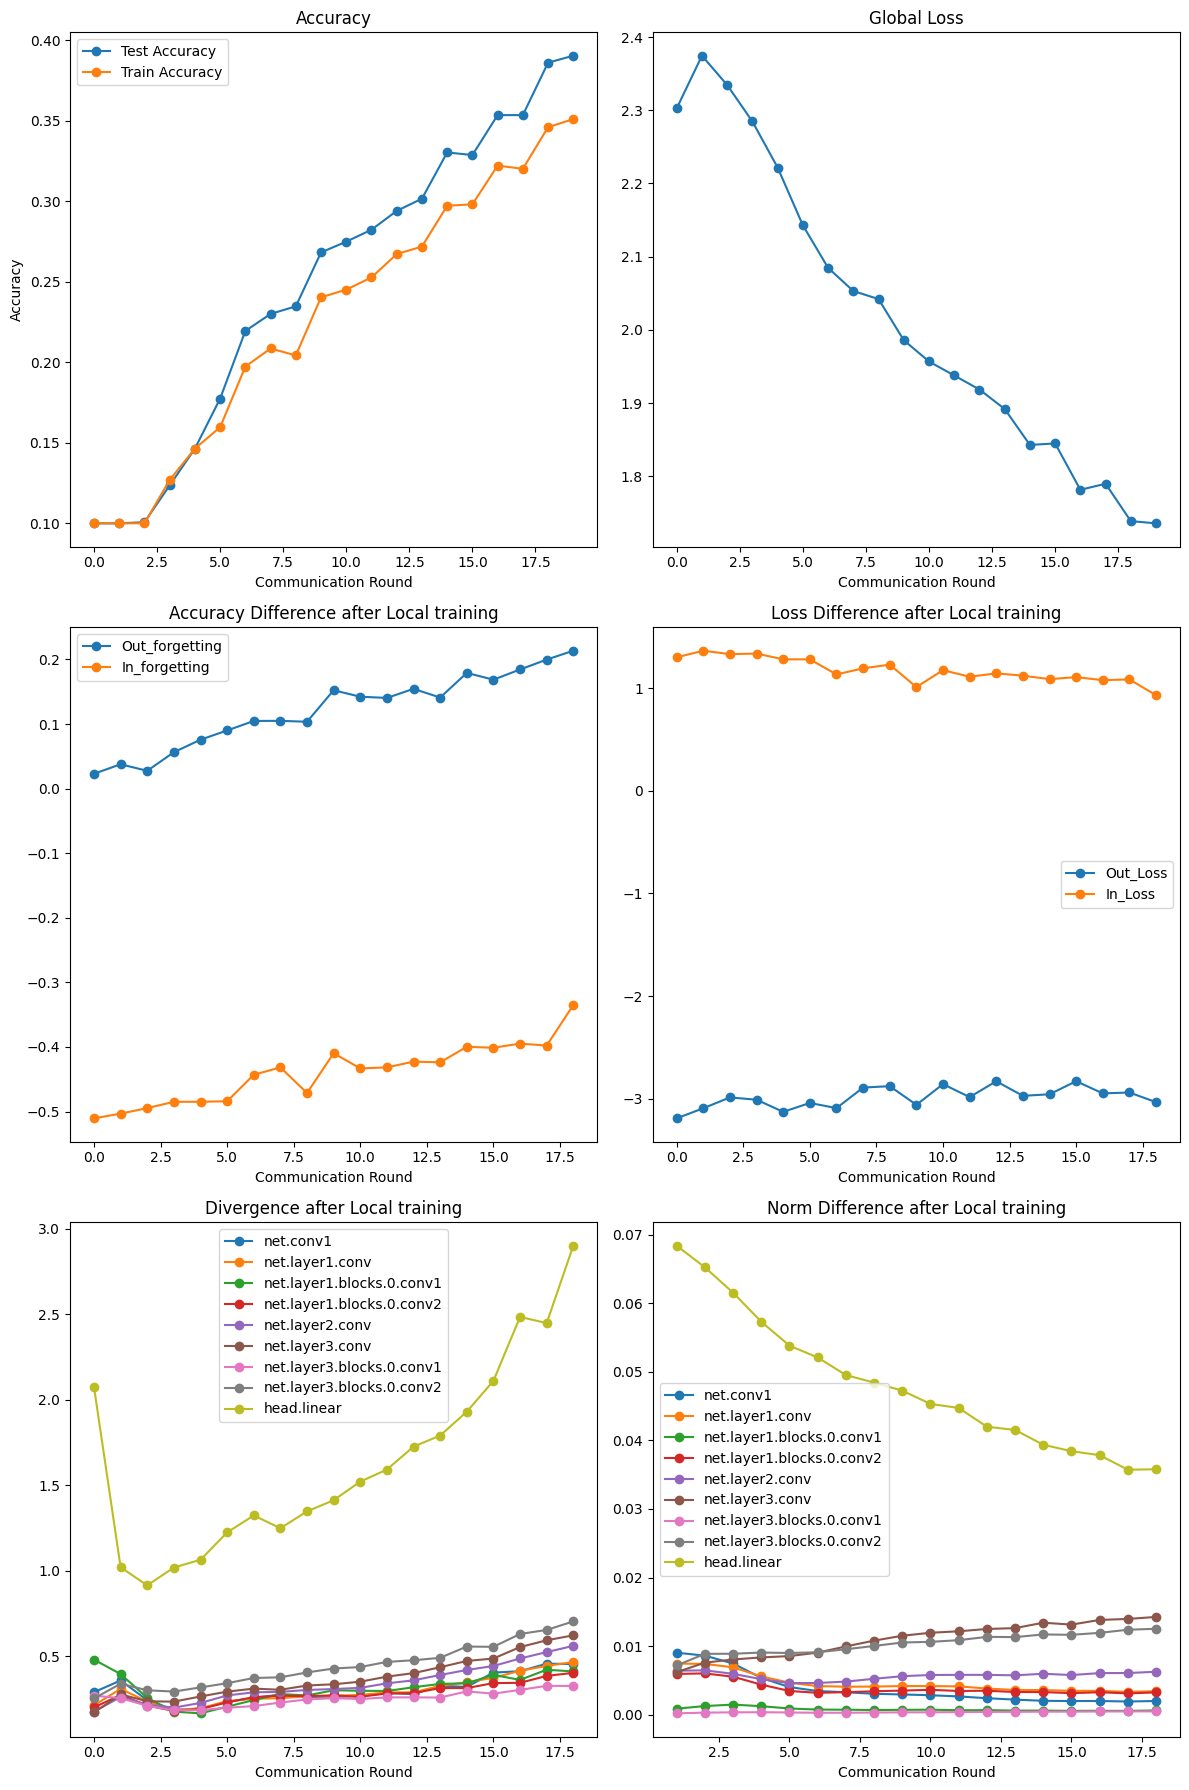

In [8]:
#fedavg epoch 2
new_visualize('slurm-10919214.out')

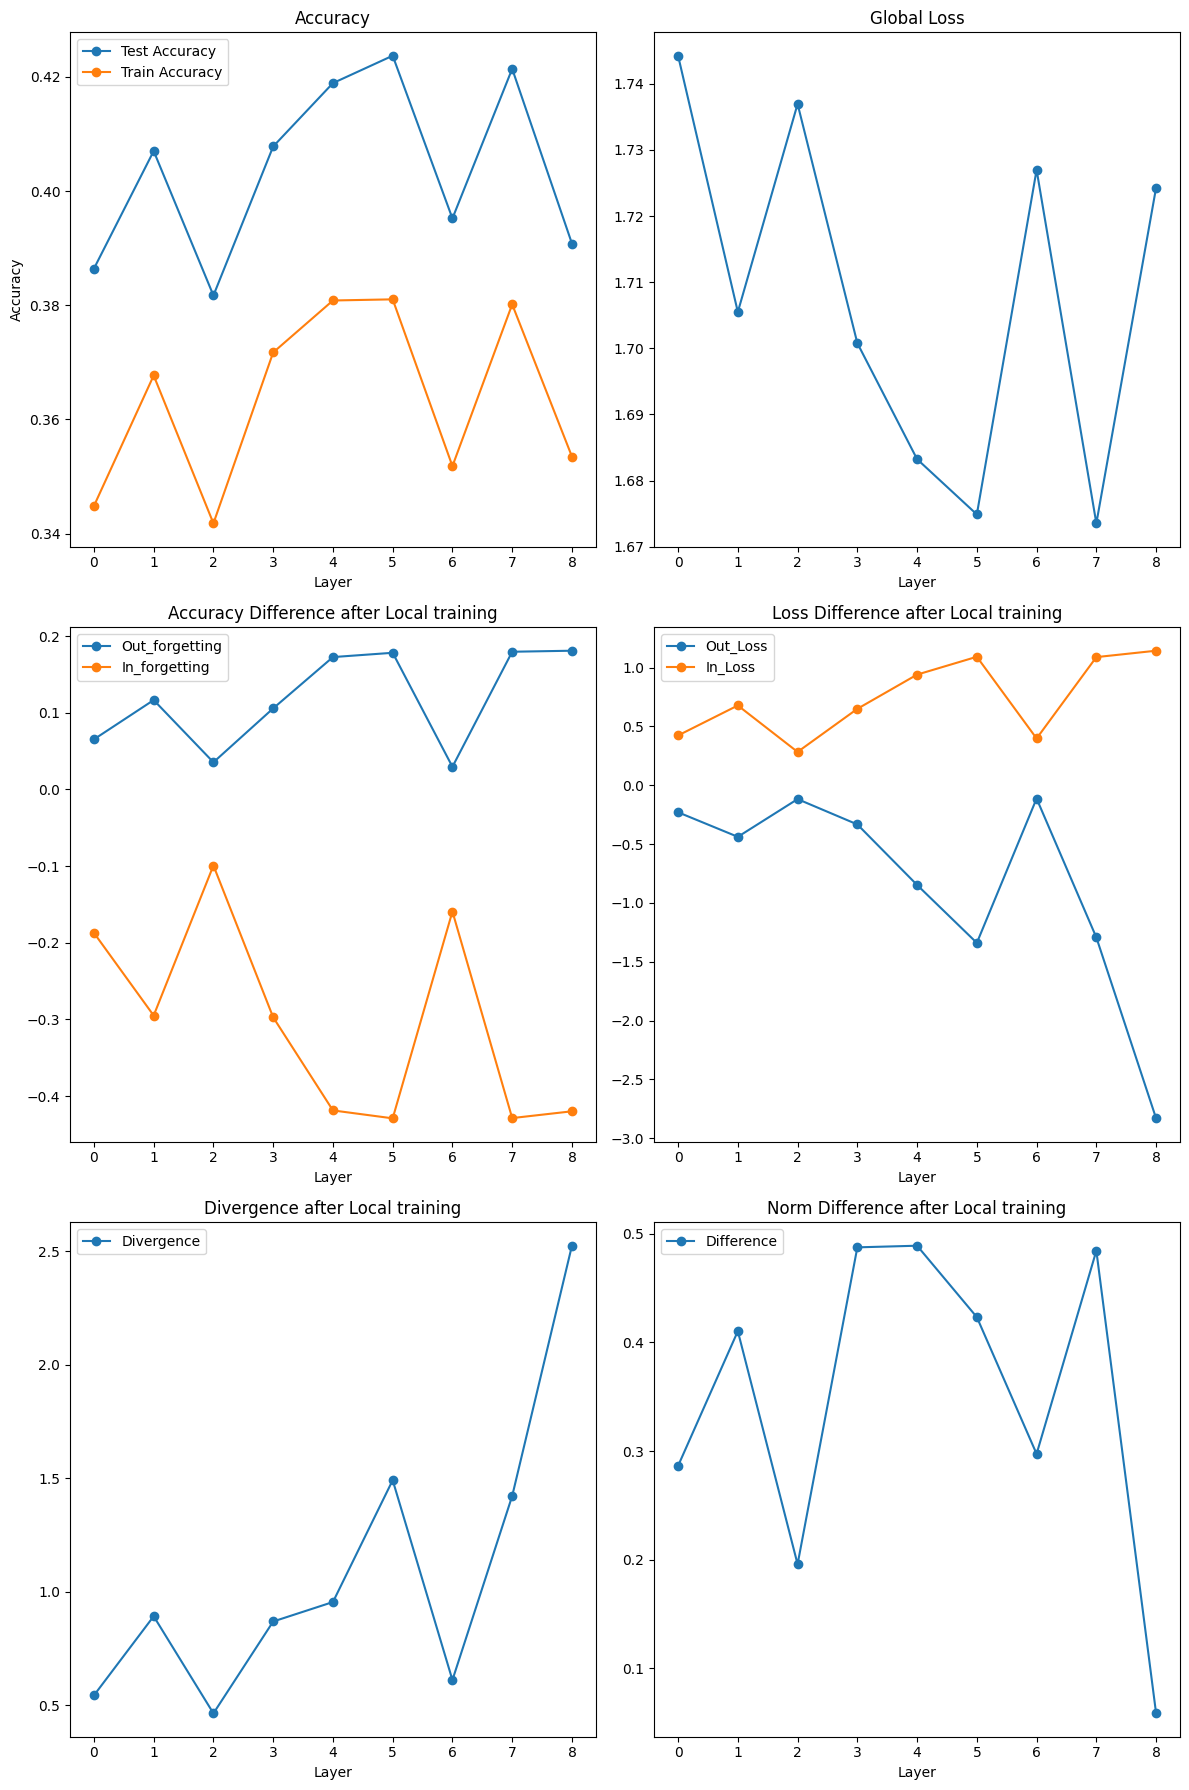

In [21]:
#fedavg epoch 2 cifar
local_visualize('slurm-10919029.out')

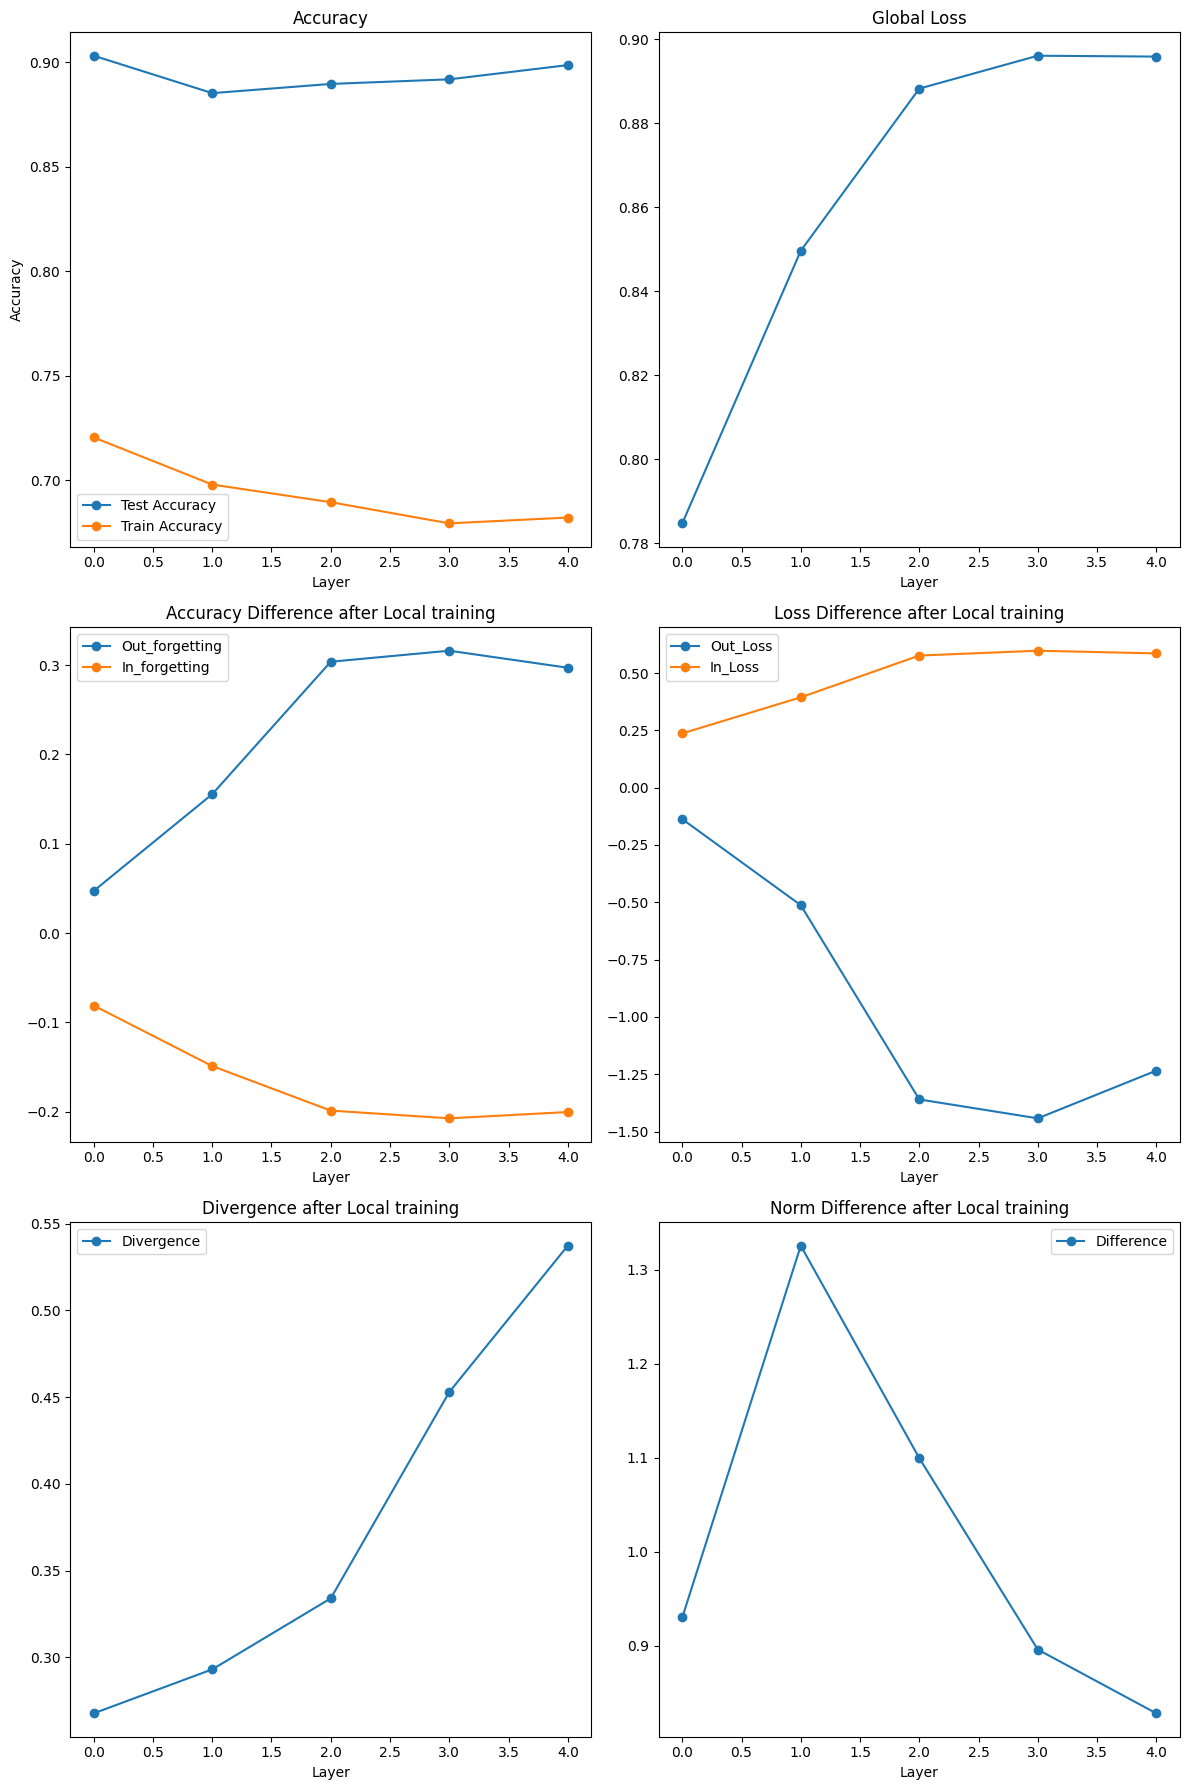

In [23]:
#fedavg epoch 2 mnist
local_visualize('slurm-10919028.out')

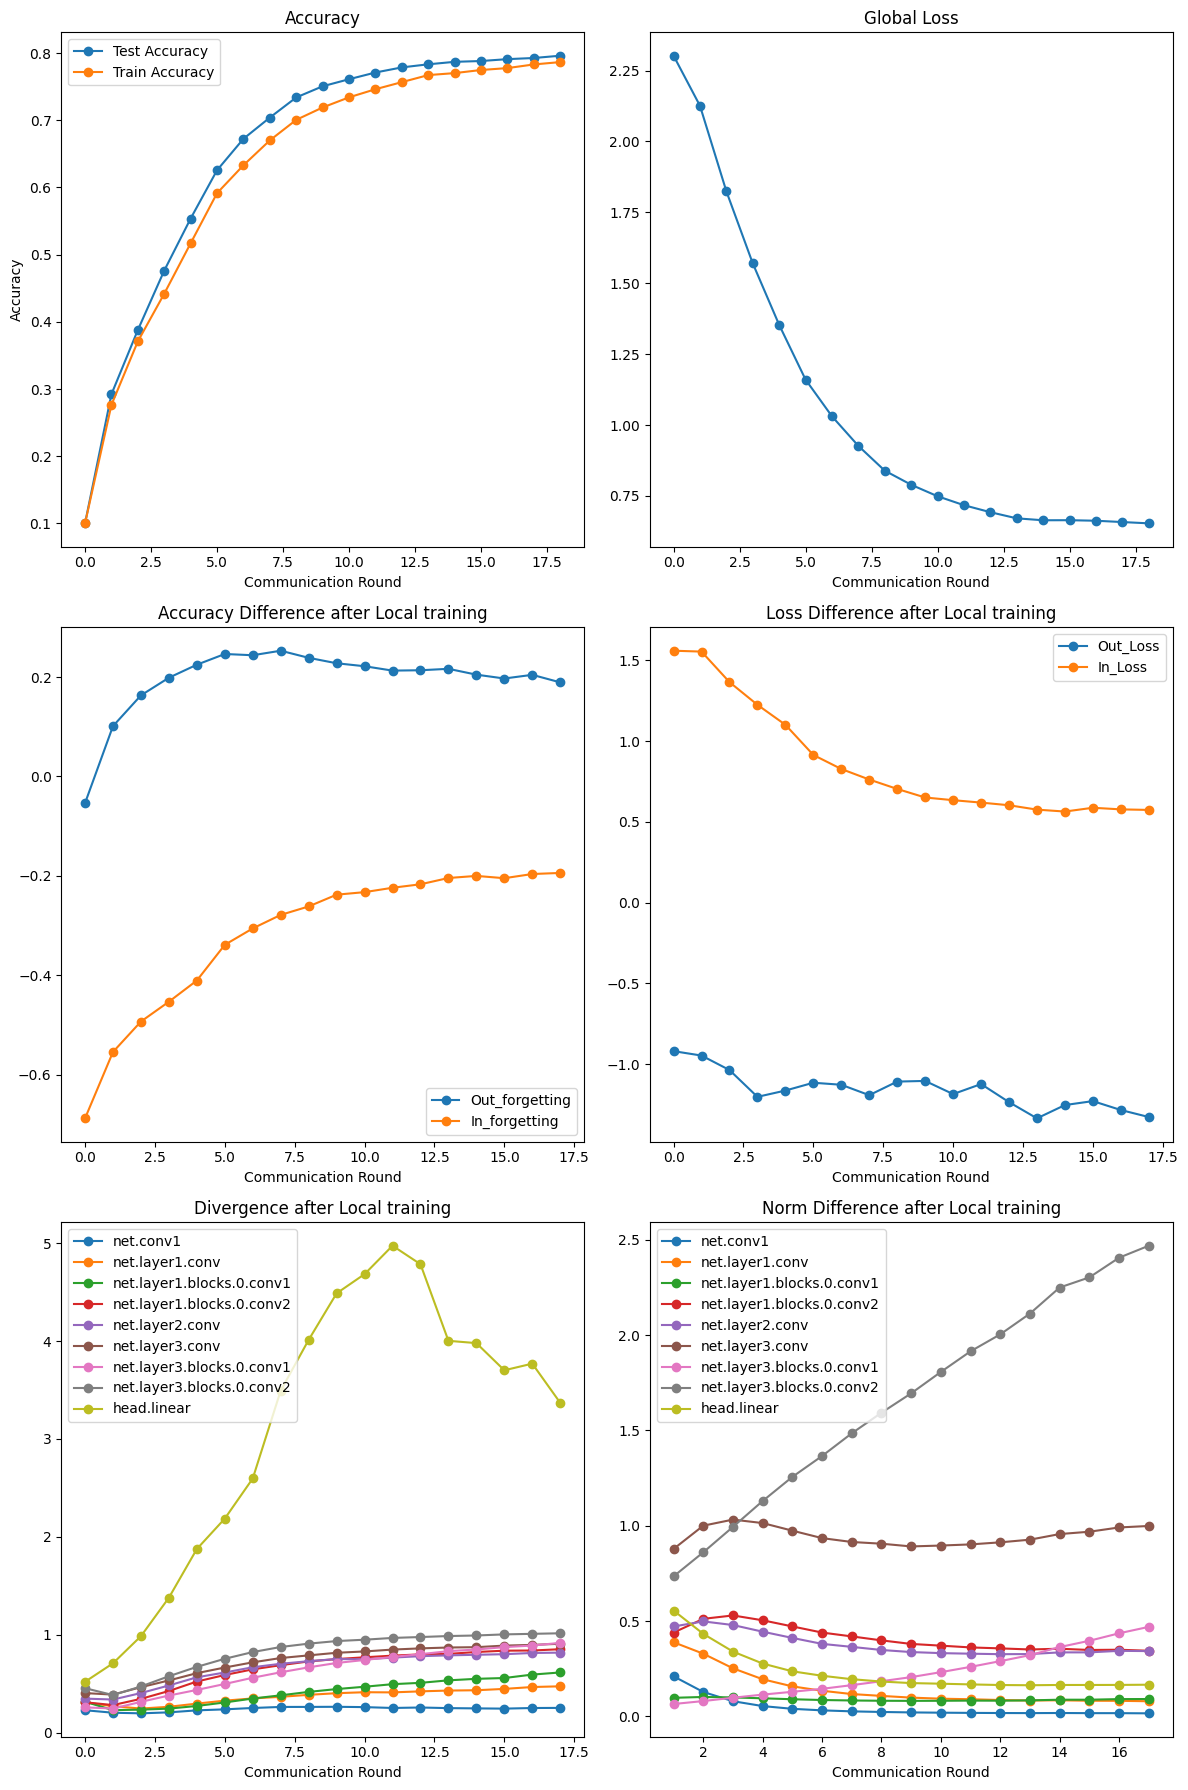

In [4]:
#fedntd epoch 30
new_visualize('slurm-10922578.out')

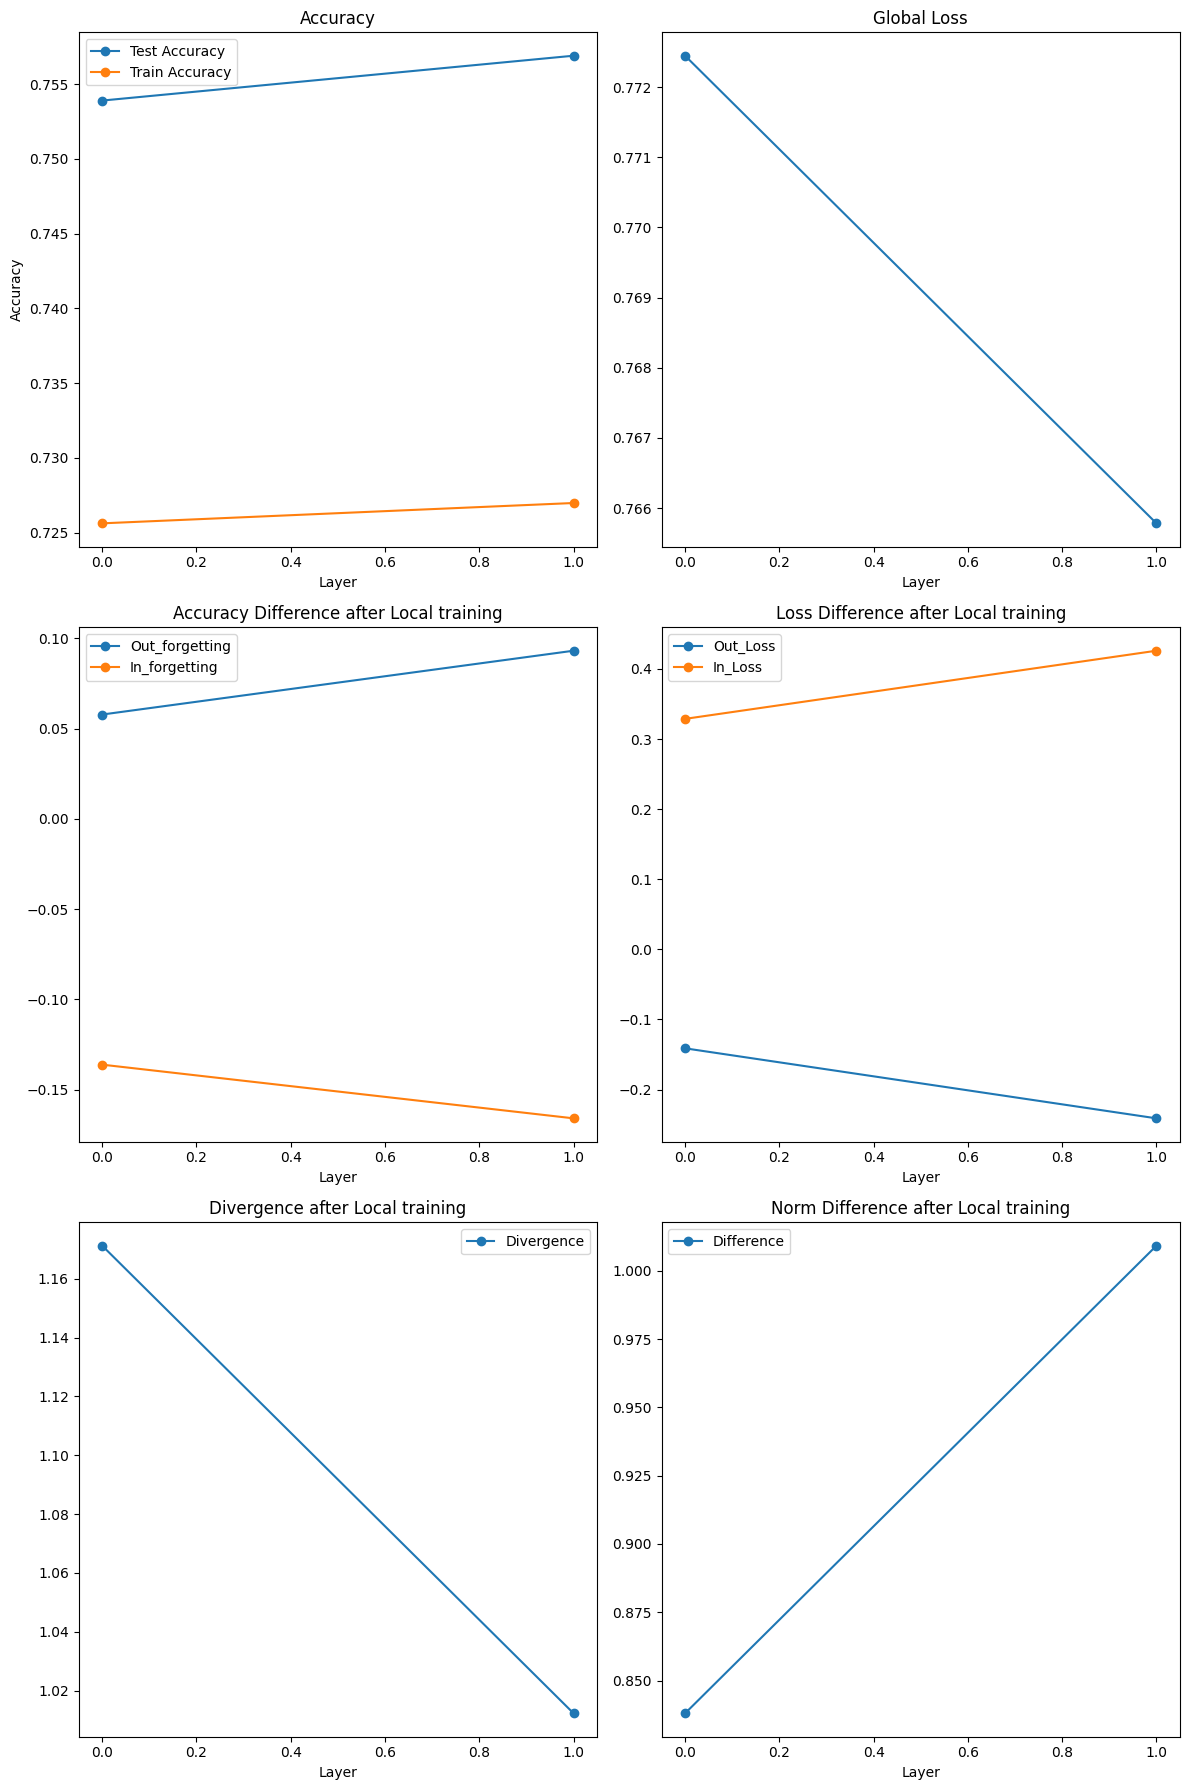

In [25]:
#fedntd epoch 30
local_visualize('slurm-10925315.out')

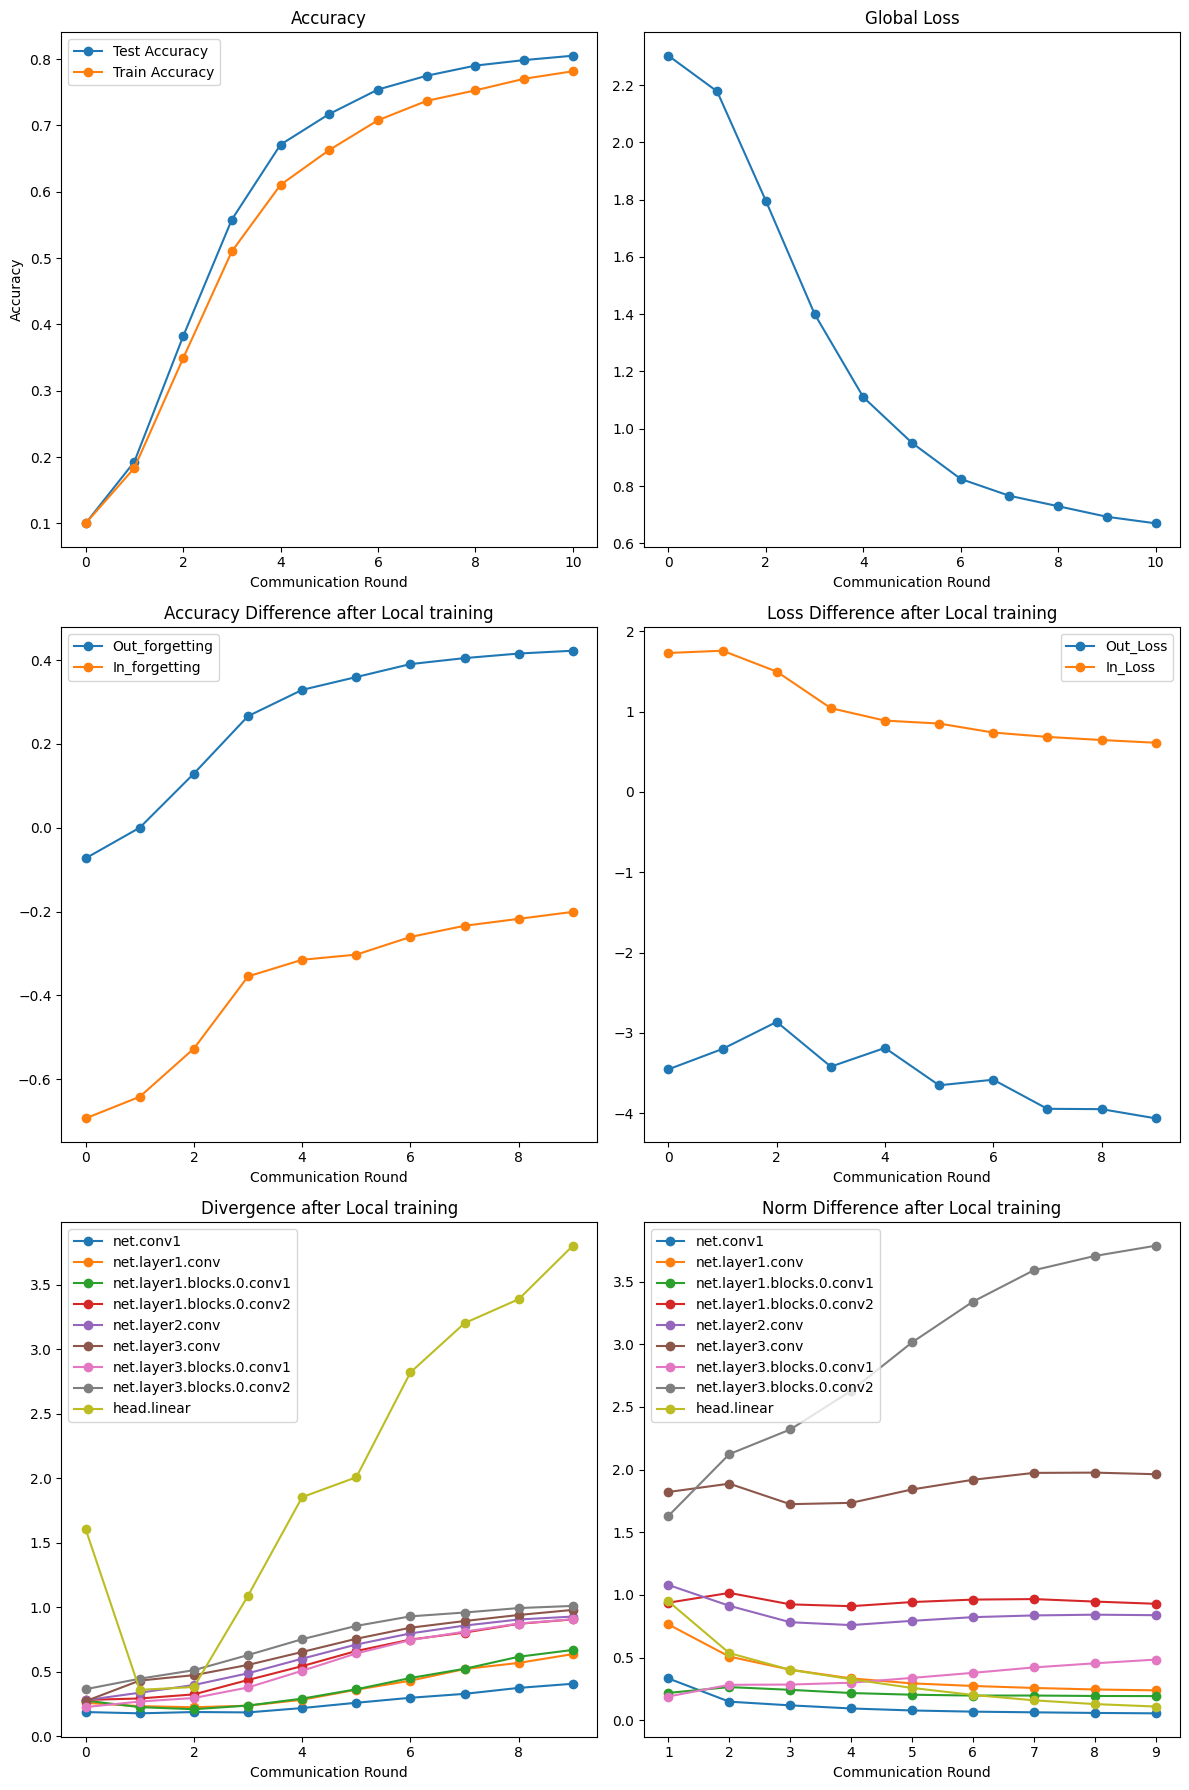

In [5]:
#fedreg epoch 30
new_visualize('slurm-10922603.out')

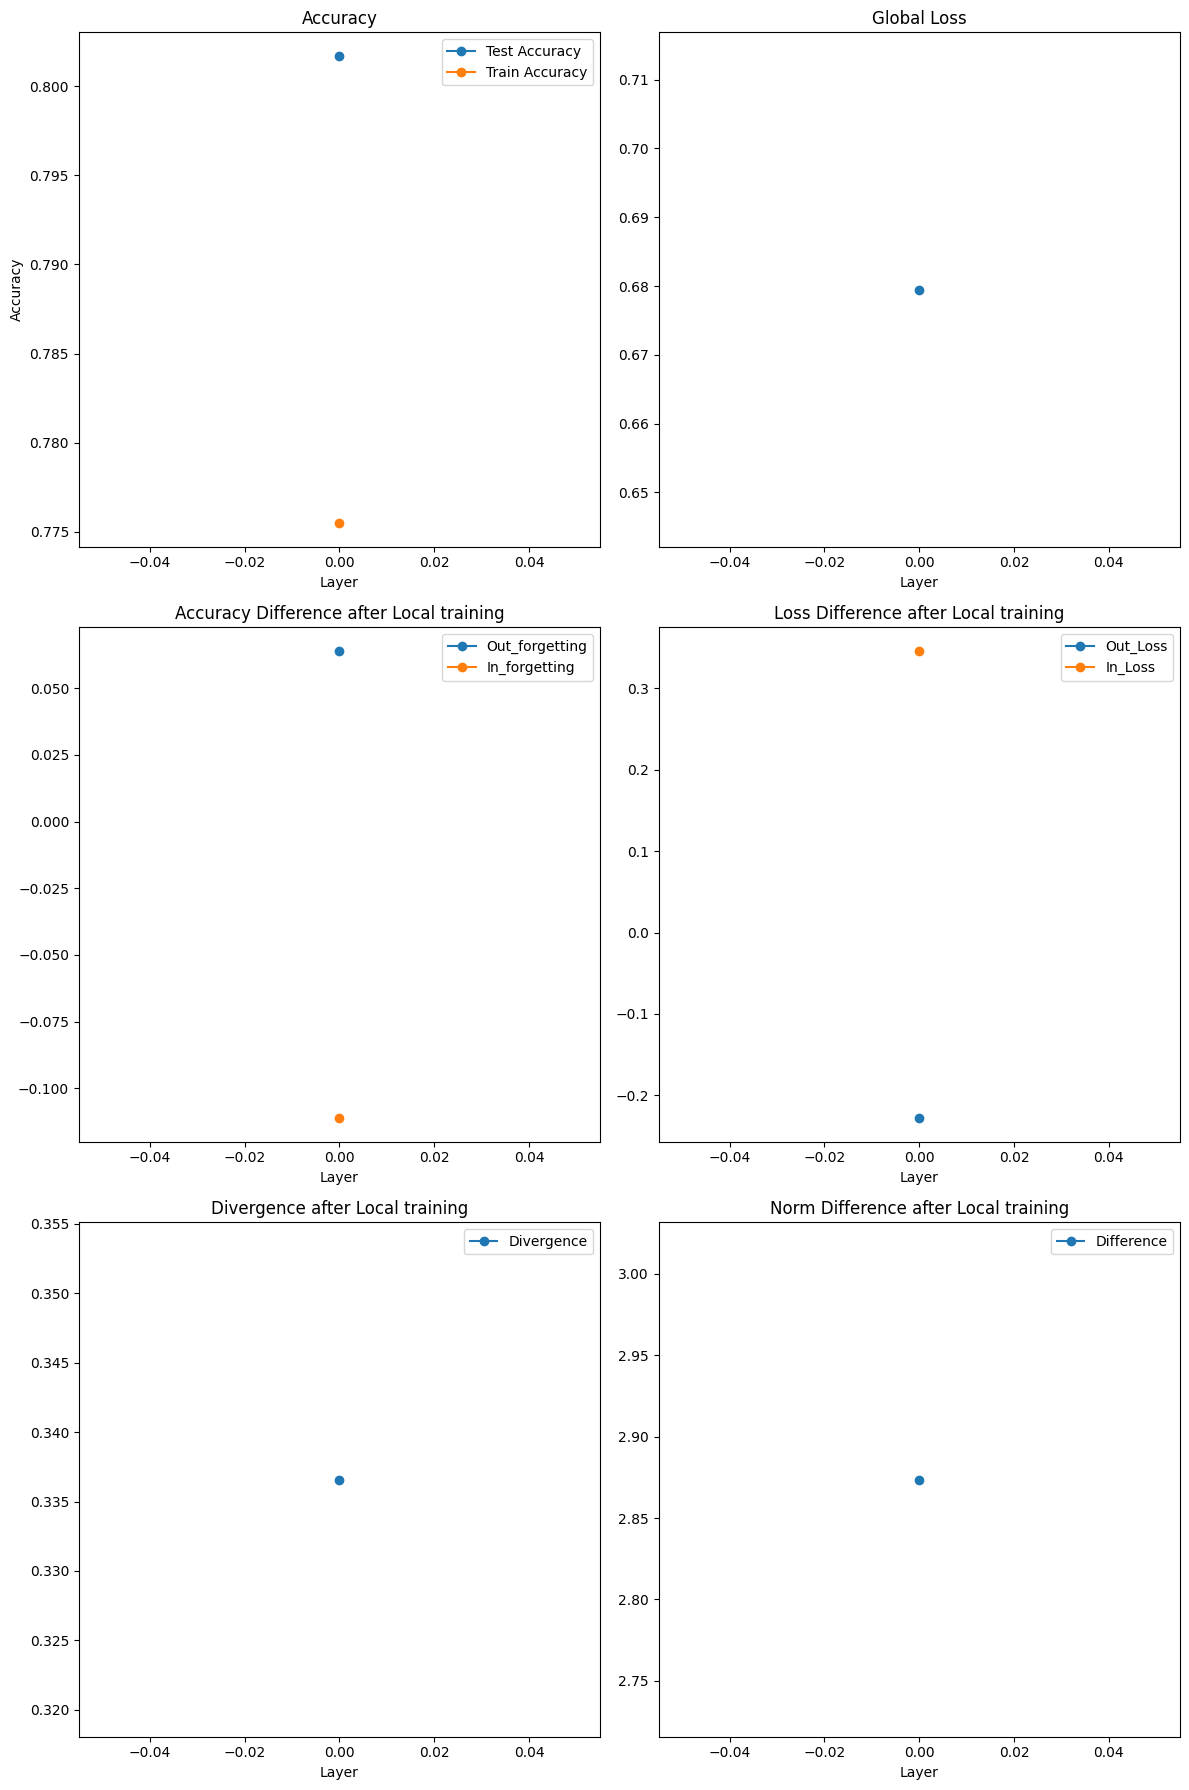

In [26]:
#fedreg epoch 30
local_visualize('slurm-10925314.out')

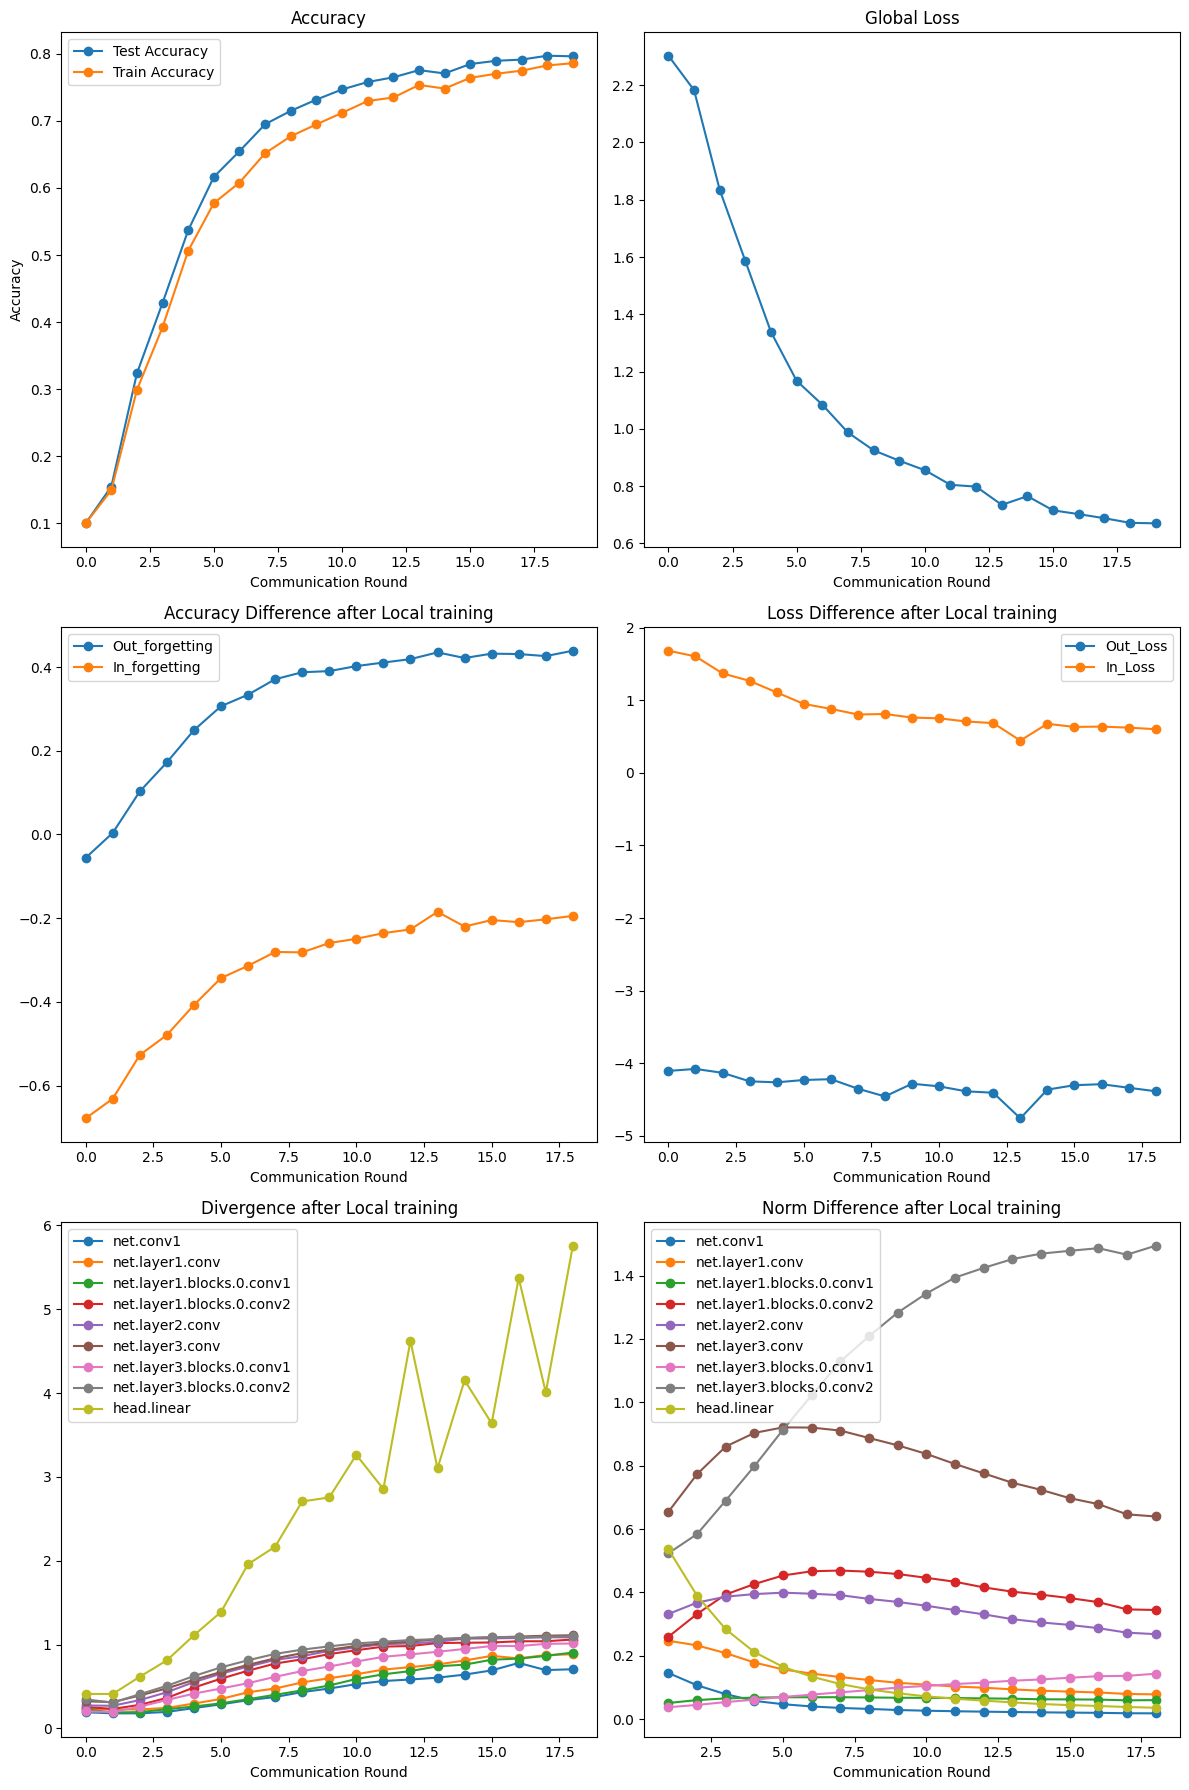

In [6]:
#fedavg
new_visualize('slurm-10922866.out')

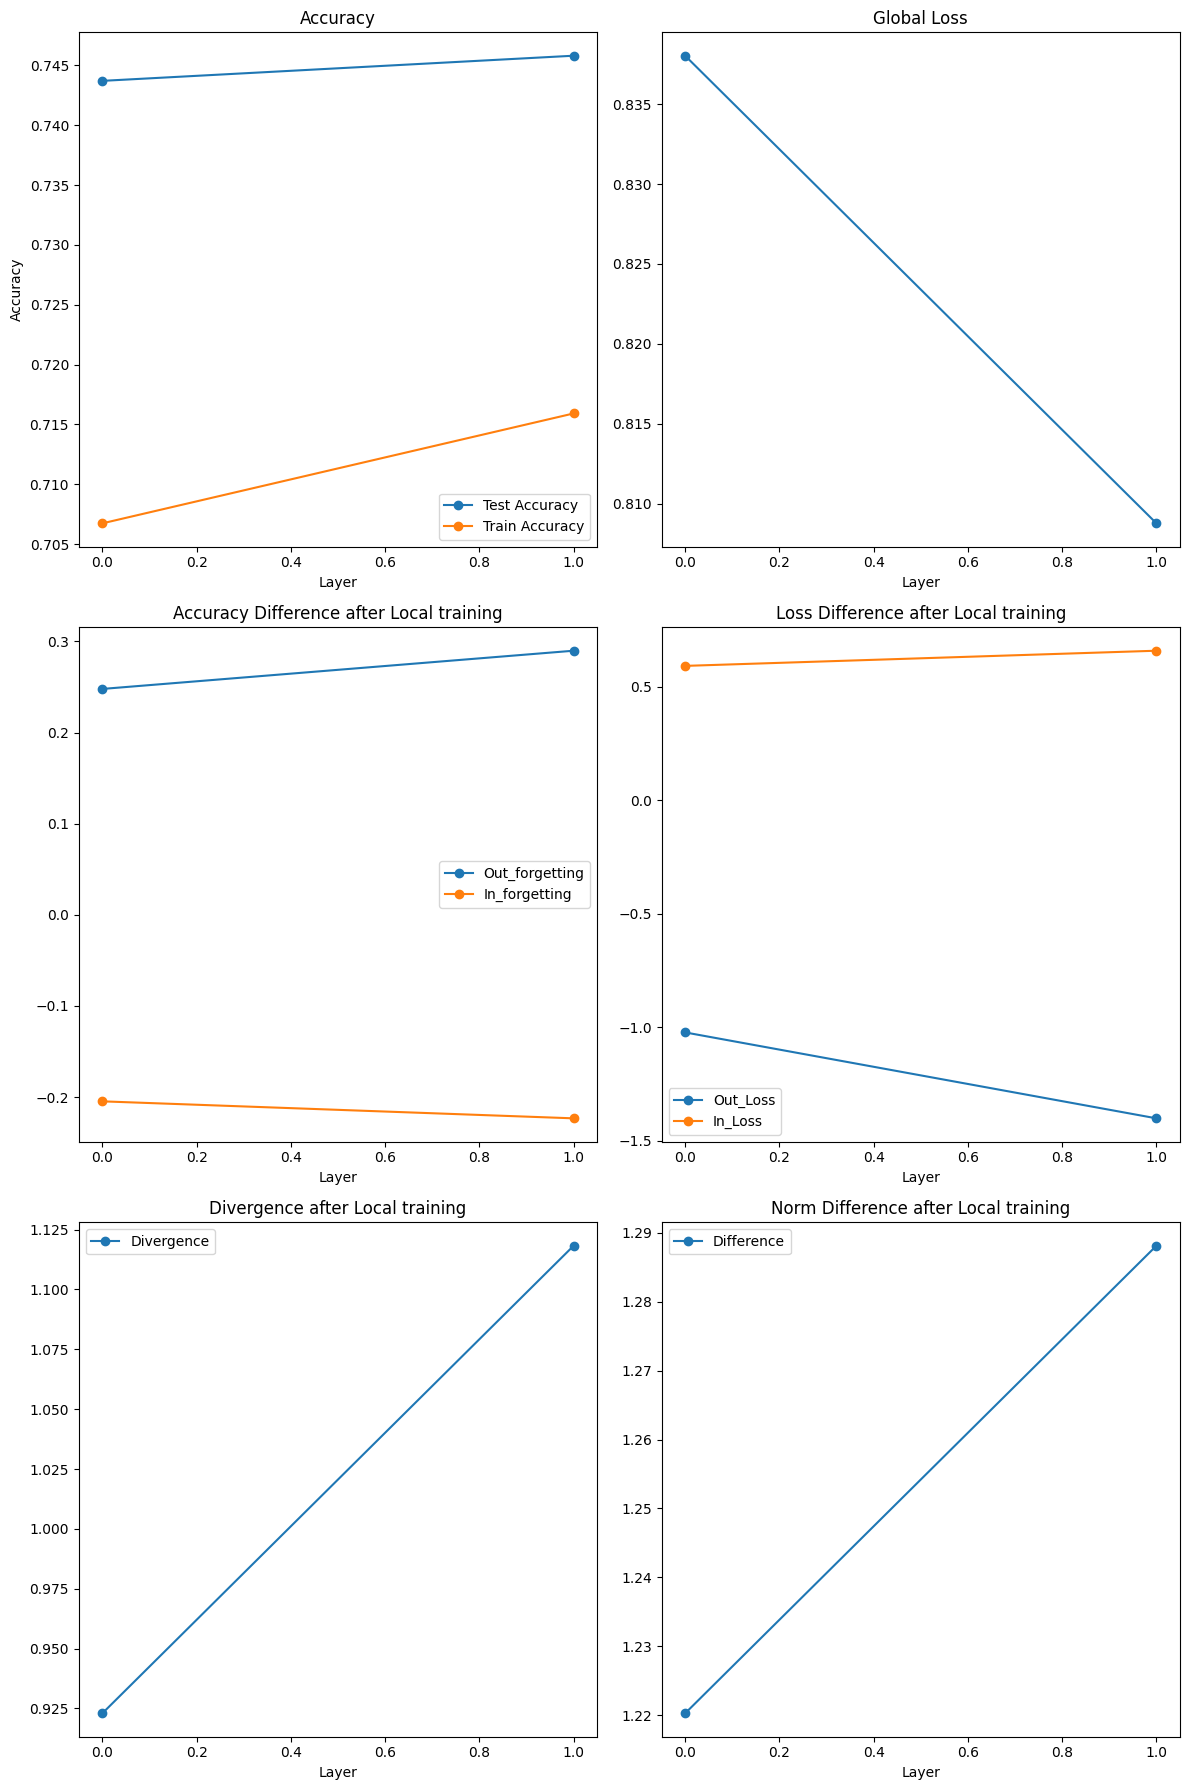

In [27]:
#fedavg epoch 30
local_visualize('slurm-10925309.out')

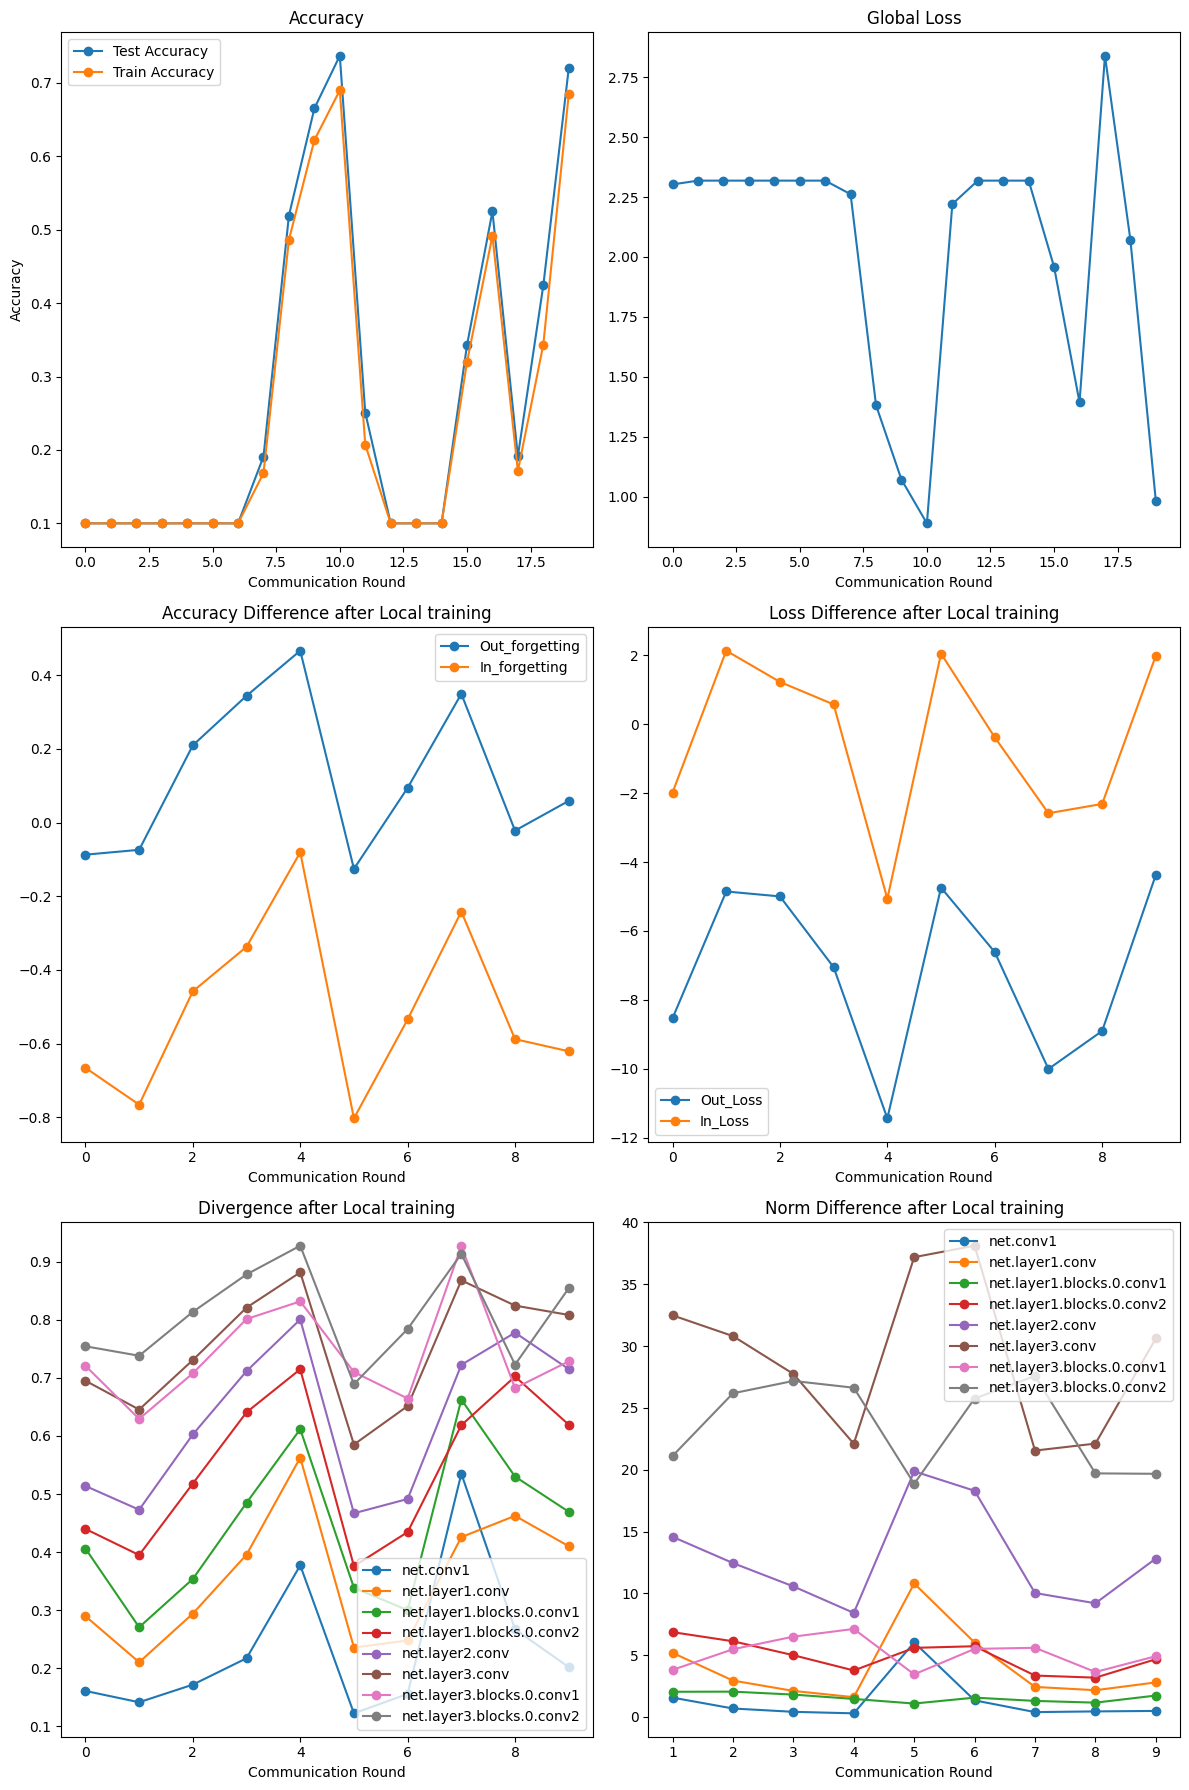

In [30]:
#fedimpress
new_visualize('train_pretrain_new_data_final_30.log')